## All Imports

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [44]:
job_events_df = pd.read_json('/mnt/data2/Projects/vdjserver/vdjserverJobEvents.json')
job_permissions_df = pd.read_json('/mnt/data2/Projects/vdjserver/vdjserverJobPermissions.json')
jobs_all_df = pd.read_json('/mnt/data2/Projects/vdjserver/vdjserverJobs_all.json')
jobs_all_df['parameters.Creator'] = jobs_all_df['parameters'].apply(lambda x: json.loads(x).get('Creator', np.nan) if x else np.nan)
metadata_perms_df = pd.read_json('/mnt/data2/Projects/vdjserver/vdjserverMetadataPermissions.json')

with open('/mnt/data2/Projects/vdjserver/vdjserverJsonArrayFeb042025.json', 'r') as f:
    jsonarray = json.load(f)

In [45]:
def json_print(item):
    print(json.dumps(item, indent = 4))

## VDJServer_mailing_list.txt 

In [46]:
mailing_list = pd.read_csv("/mnt/data2/Projects/vdjserver/VDJServer_mailing_list.txt", sep = ';', skiprows = 8)
mailing_list.columns = ['Email']
mailing_list = mailing_list.iloc[:-5]
mailing_list['updated_email'] = mailing_list['Email'].apply(lambda row: row.replace(" at ", "@"))

# mailing_list['updated_email'].to_csv('email_list.txt', index = False)
print(mailing_list)

                                Email                  updated_email
0              12ysliu2 at stu.edu.cn            12ysliu2@stu.edu.cn
1               18982180702 at msn.cn             18982180702@msn.cn
2    2008110020 at alumni.sjtu.edu.cn  2008110020@alumni.sjtu.edu.cn
3                2383920158 at qq.com              2383920158@qq.com
4              2deepayan at gmail.com            2deepayan@gmail.com
..                                ...                            ...
571               zhanxw at gmail.com               zhanxw@gmail.com
572             zhe.sang at gmail.com             zhe.sang@gmail.com
573             zicheng at utexas.edu             zicheng@utexas.edu
574              zluo819 at gmail.com              zluo819@gmail.com
575            zyf950619 at gmail.com            zyf950619@gmail.com

[576 rows x 2 columns]


## Check What Kind Of Metadata We Have

In [47]:
item_types = set()
for item in jsonarray:
    item_type = item['name']
    item_types.add(item_type)
print(sorted(item_types))
print(len(item_types))

['adc_cache', 'adc_cache_repertoire', 'adc_cache_study', 'adc_system_repositories', 'archive_project', 'async_query', 'bioProcessing', 'bioProcessingColumns', 'cellProcessing', 'cellProcessingColumns', 'communityDataSRA', 'data_processing', 'deletedProject', 'diagnosis', 'diagnosisColumns', 'feedback', 'garbage', 'irplus_analysis', 'job', 'nucleicAcidProcessing', 'nucleicAcidProcessingColumns', 'passwordReset', 'private_project', 'processMetadata', 'profile', 'project', 'projectFile', 'projectJob', 'projectJobArchive', 'projectJobFile', 'projectLoad', 'projectPublishInProcess', 'projectUnpublishInProcess', 'publicProject', 'public_project', 'rearrangementLoad', 'repertoire', 'sample', 'sampleColumns', 'sampleGroup', 'sample_processing', 'statistics_cache', 'statistics_cache_repertoire', 'statistics_cache_study', 'subject', 'subjectColumns', 'test', 'testMetadata', 'testmetadata', 'testmetadatamp', 'userVerification', 'vdjpipeWorkflow']
52


In [151]:
for item in jsonarray:
    item_type = item['name']
    if item_type == 'publicProject':
        print(json.dumps(item, indent = 4))
        break
        

{
    "_id": {
        "$oid": "58925d85e4b0e5e1cf0739a4"
    },
    "uuid": "6410201027101126170-242ac11c-0001-012",
    "schemaId": null,
    "internalUsername": null,
    "associationIds": [],
    "lastUpdated": "2017-02-06T11:37:38.824-06:00",
    "name": "publicProject",
    "value": {
        "name": "My project",
        "showArchivedJobs": false
    },
    "created": "2017-02-01T16:13:25.986-06:00",
    "owner": "vdj",
    "tenantId": "vdjserver.org"
}


## Look At User Email Informations
- Contains email
- Firstname, Lastname
- City, State, Country

In [49]:
profile_list = []
for item in jsonarray:
    item_type = item['name']
    if item_type == 'profile':
        uuid = item.get('uuid', None)
        first_name = item.get('value', {}).get('firstName', None)
        last_name = item.get('value', {}).get('lastName', None)
        email = item.get('value', {}).get('email', None)
        city = item.get('value', {}).get('city', None)
        state = item.get('value', {}).get('state', None)
        country = item.get('value', {}).get('country', None)
        created = item.get('created', None)
        last_updated = item.get('lastUpdated', None)
            # Append the extracted data as a dictionary to the list
        profile_list.append({
            'uuid': uuid,
            'firstName': first_name,
            'lastName': last_name,
            'email': email,
            'city': city,
            'state': state,
            'country': country,
            'created': created,
            'lastUpdated': last_updated
        })
# Create a DataFrame from the list of extracted data
df_profile = pd.DataFrame(profile_list)
# Print the DataFrame
df_profile.tail()

uuid              firstName  \
1817  6242932598575984145-242ac118-0001-012                Rodrigo   
1818  2755888095932968465-242ac118-0001-012                Rodrigo   
1819  5481029658171207185-242ac118-0001-012                    Eve   
1820  4458895817601248785-242ac118-0001-012                          
1821  9076859566261923345-242ac118-0001-012  Chinweike Christopher   

             lastName                                 email       city  \
1817  García Valiente      r.garciavaliente@amsterdamumc.nl  Amsterdam   
1818  García Valiente      r.garciavaliente@amsterdamumc.nl              
1819       Richardson                   erichardson@lji.org  San Diego   
1820                   samuel.wollenburg@utsouthwestern.edu              
1821            Udoye    chinweikechristopher.udoye@uksh.de     Lübeck   

                   state        country                        created  \
1817                        Netherlands  2025-01-02T11:11:52.894-06:00   
1818                                     2025-01-02T11:41:52.070-06:00   
1819          California  United States  2025-01-07T18:01:25.657-06:00   
1820                                     2025-01-07T20:24:59.390-06:00   
1821  Schleswig-Holstein        Germany  2025-01-17T07:54:02.133-06:00   

                        lastUpdated  
1817  2025-01-02T11:11:52.894-06:00  
1818  2025-01-02T11:41:52.070-06:00  
1819  2025-01-07T18:01:25.657-06:00  
1820  2025-01-07T20:24:59.390-06:00  
1821  2025-01-17T07:54:02.133-06:00

## Look at UserVerification Data
- Contains Username
- Contains if the user is verified or not

In [50]:
userVerification_list = []
for item in jsonarray:
    item_type = item['name']
    if item_type == 'userVerification':
        uuid = item.get('uuid', None)  # Use .get() to avoid KeyError if 'uuid' is missing
        username = item.get('value', {}).get('username', None)  # Check if 'username' exists in 'value'
        is_verified = item.get('value', {}).get('isVerified', None)  # Check if 'isVerified' exists in 'value'
        last_updated = item.get('lastUpdated', None)
        # Append the extracted data as a dictionary to the list
        userVerification_list.append({
            'uuid': uuid,
            'username': username,
            'isVerified': is_verified,
            'last_updated': last_updated
        })
# Create a DataFrame from the list of extracted data
df_userVerification = pd.DataFrame(userVerification_list)
# Print the DataFrame
print(f"Total Number of User: {df_userVerification.shape}")
df_userVerification.tail()

Total Number of User: (1881, 4)


uuid        username isVerified  \
1876  6215315958862704145-242ac118-0001-012         rgarcia      False   
1877  2740039666610728465-242ac118-0001-012        rgarciav      False   
1878  5464751732119367185-242ac118-0001-012     erichardson       True   
1879  4443820482392288785-242ac118-0001-012          samwol       True   
1880  9055857176184483345-242ac118-0001-012  chrisjames1992      False   

                       last_updated  
1876  2025-01-02T11:11:53.537-06:00  
1877  2025-01-02T11:41:52.439-06:00  
1878  2025-01-07T18:01:47.373-06:00  
1879  2025-01-23T11:35:37.964-06:00  
1880  2025-01-17T07:54:02.622-06:00

## Look at ProjectFile data
  - Contains only ProjectUUID
  - Contains file upload information for the project
  - Contains P

In [134]:
projectFiles_list = []
for item in jsonarray:
    item_type = item['name']
    if item_type == 'projectFile':
        uuid = item.get('uuid', None)
        associationIds = item.get('associationIds', None)
        projectUuid = item.get('value', {}).get('projectUuid', None)
        owner = item.get('owner', None)
        task_type= item.get('value', {}).get('type', None)
        file_name = item.get('value', {}).get('name', None)
        mimeType = item.get('value', {}).get('mimeType', None)
        last_updated = item.get('lastUpdated', None)
        if associationIds:
            associationIds_1 = associationIds[0]
            if len(associationIds)>1:
                associationIds_2 = associationIds[1]
                if len(associationIds) > 2:
                    print("Length associationIds: ", len(associationIds))
            else:
                associationIds_2 = None
        else:
            associationIds_1 = None
            associationIds_2 = None
        # Append the extracted data as a dictionary to the list
        projectFiles_list.append({
            'uuid': uuid,
            'projectUuid': projectUuid,
            'associationIds_1': associationIds_1,
            'associationIds_2': associationIds_2,
            'owner': owner,
            'task_type': task_type,
            'file_name': file_name,
            'mimeType': mimeType,
            'last_updated': last_updated
        })

# Create a DataFrame from the list of extracted data
df_projectFiles = pd.DataFrame(projectFiles_list)
# Print the DataFrame
df_projectFiles.tail()

uuid  \
35943  5338423137409494545-242ac118-0001-012   
35944  1335427718191574545-242ac118-0001-012   
35945  1840700597200490991-242ac118-0001-012   
35946  5023614960920170991-242ac118-0001-012   
35947  7830832104257678865-242ac118-0001-012   

                                 projectUuid  \
35943  5456400192359305711-242ac118-0001-012   
35944  5456400192359305711-242ac118-0001-012   
35945  5456400192359305711-242ac118-0001-012   
35946  5456400192359305711-242ac118-0001-012   
35947  5456400192359305711-242ac118-0001-012   

                            associationIds_1  \
35943  6793987554023894545-242ac112-0001-002   
35944  2833383462017494545-242ac112-0001-002   
35945   366925519251050991-242ac112-0001-002   
35946  3549539235260010991-242ac112-0001-002   
35947  8017190735231118865-242ac112-0001-002   

                            associationIds_2 owner task_type  \
35943  5456400192359305711-242ac118-0001-012   vdj      None   
35944  5456400192359305711-242ac118-0001-012   vdj      None   
35945  5456400192359305711-242ac118-0001-012   vdj      None   
35946  5456400192359305711-242ac118-0001-012   vdj      None   
35947  5456400192359305711-242ac118-0001-012   vdj      None   

                           file_name mimeType                   last_updated  
35943  4468_S24_L001_R1_001.fastq.gz     None  2025-01-13T16:40:40.230-06:00  
35944  4468_S24_L001_R2_001.fastq.gz     None  2025-01-13T16:40:40.230-06:00  
35945  6634_S25_L001_R1_001.fastq.gz     None  2025-01-13T16:40:43.277-06:00  
35946  6634_S25_L001_R2_001.fastq.gz     None  2025-01-13T16:40:43.281-06:00  
35947                  primers.fasta     None  2025-01-13T16:41:49.035-06:00

In [52]:
#Keeping only projectfiles if the are owned by vdj and schristley
# df_projectFiles = df_projectFiles[df_projectFiles.owner.isin(['vdj', 'schristley'])]
df_projectFiles.owner.value_counts()


owner
vdj                31713
schristley          1250
wscarbor             891
wrounds              517
esalina              416
                   ...  
mrojas                 1
rytis                  1
randocalrissian        1
hrhinn                 1
xmr5148                1
Name: count, Length: 102, dtype: int64

In [53]:
df_projectFiles[df_projectFiles.file_name == '18M.fasta']

uuid  \
18796  2428928387311529495-242ac119-0001-012   
21542   646759332934512150-242ac116-0001-012   

                                 projectUuid  \
18796  7058216970366620136-242ac11e-0001-012   
21542  3276777473314001386-242ac116-0001-012   

                            associationIds_1  \
18796  4248491282261929495-242ac112-0001-002   
21542  2075952650351472150-242ac113-0001-002   

                            associationIds_2 owner task_type  file_name  \
18796  7058216970366620136-242ac11e-0001-012   vdj      None  18M.fasta   
21542  3276777473314001386-242ac116-0001-012   vdj      None  18M.fasta   

      mimeType                   last_updated  
18796     None  2019-02-15T16:20:15.208-06:00  
21542     None  2020-01-17T10:25:24.813-06:00

## Look at projectJob data
  - Contains ProjectUUID and JobUUID

In [54]:
projectJob_list = []
for item in jsonarray:
    item_type = item['name']
    if item_type == 'projectJob':
        # json_print(item)
        uuid = item.get('uuid', None)
        owner = item.get('owner', None)
        projectUuid = item.get('value', {}).get('projectUuid', None)
        jobUuid = item.get('value', {}).get('jobUuid', None)
        last_updated = item.get('lastUpdated', None)
        projectJob_list.append({
            'uuid': uuid,
            'owner': owner,
            'projectUuid': projectUuid,
            'jobUuid': jobUuid,
            'lastUpdated': last_updated
        })

# Create a DataFrame from the list of extracted data
df_projectJob = pd.DataFrame(projectJob_list)
df_projectJob

uuid owner  \
0      0001400192074855-5056a550b8-0001-012   vdj   
1      0001400254373114-5056a550b8-0001-012   vdj   
2      0001400273862423-5056a550b8-0001-012   vdj   
3      0001400274448495-5056a550b8-0001-012   vdj   
4      0001400274714655-5056a550b8-0001-012   vdj   
...                                     ...   ...   
6350  5097479121213854191-242ac118-0001-012   vdj   
6351  1948444895656078865-242ac118-0001-012   vdj   
6352  1819643224410746385-242ac118-0001-012   vdj   
6353  2845695380777266705-242ac118-0001-012   vdj   
6354  3203620026767118831-242ac118-0001-012   vdj   

                                projectUuid  \
0      0001399309581559-5056a550b8-0001-012   
1      0001400250478554-5056a550b8-0001-012   
2      0001400250478554-5056a550b8-0001-012   
3      0001400250478554-5056a550b8-0001-012   
4      0001400250478554-5056a550b8-0001-012   
...                                     ...   
6350  6589143665654501871-242ac118-0001-012   
6351  5456400192359305711-242ac118-0001-012   
6352  5199144433477554666-242ac116-0001-012   
6353  5456400192359305711-242ac118-0001-012   
6354  5456400192359305711-242ac118-0001-012   

                                       jobUuid                    lastUpdated  
0         0001399315558601-5056a550b8-0001-007  2014-05-15T17:14:34.855-05:00  
1         0001400254372814-5056a550b8-0001-007  2014-05-16T10:32:53.114-05:00  
2         0001400273862119-5056a550b8-0001-007  2014-05-16T15:57:42.423-05:00  
3         0001400274448320-5056a550b8-0001-007  2014-05-16T16:07:28.494-05:00  
4         0001400274714490-5056a550b8-0001-007  2014-05-16T16:11:54.655-05:00  
...                                        ...                            ...  
6350  ad02cb34-250e-48cb-a06e-973e431b62ee-007  2025-01-08T12:13:35.460-06:00  
6351  c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007  2025-01-13T16:44:05.995-06:00  
6352  773a5cb7-b369-4517-a221-83d57e3899e5-007  2025-01-20T03:06:57.762-06:00  
6353  9188bf80-e868-4e05-a6b4-308c044108d7-007  2025-01-23T15:05:59.570-06:00  
6354  c7cd08ad-a560-4574-a363-b9cc4c5e051d-007  2025-01-24T20:57:54.599-06:00  

[6355 rows x 5 columns]

In [55]:
df_projectJob[df_projectJob.projectUuid == '7058216970366620136-242ac11e-0001-012']

uuid owner  \
3524   360484783884014056-242ac11e-0001-012   vdj   
3525  5644951932076289560-242ac11e-0001-012   vdj   
3622  4704510086896283160-242ac11e-0001-012   vdj   
3840  8974371275809231336-242ac11e-0001-012   vdj   
3841   185958136163013096-242ac11e-0001-012   vdj   
4225   753010572288070121-242ac119-0001-012   vdj   
4226  8331554514421092841-242ac119-0001-012   vdj   

                                projectUuid  \
3524  7058216970366620136-242ac11e-0001-012   
3525  7058216970366620136-242ac11e-0001-012   
3622  7058216970366620136-242ac11e-0001-012   
3840  7058216970366620136-242ac11e-0001-012   
3841  7058216970366620136-242ac11e-0001-012   
4225  7058216970366620136-242ac11e-0001-012   
4226  7058216970366620136-242ac11e-0001-012   

                                    jobUuid                    lastUpdated  
3524   217677121292014056-242ac11b-0001-007  2018-04-17T10:50:14.832-05:00  
3525  5814903787979009560-242ac11b-0001-007  2018-04-17T13:54:01.922-05:00  
3622  4916552622299803160-242ac11b-0001-007  2018-05-30T16:16:40.464-05:00  
3840  8802787332334031336-242ac11b-0001-007  2018-07-16T11:22:51.666-05:00  
3841     0029001919173096-242ac11b-0001-007  2018-07-16T11:40:55.535-05:00  
4225   592378795417670121-242ac11c-0001-007  2019-02-27T16:40:20.145-06:00  
4226  8144122141623652841-242ac11c-0001-007  2019-02-27T16:31:40.346-06:00

In [111]:
job_uuid = '8802787332334031336-242ac11b-0001-007'
jobs_all_df[jobs_all_df.uuid == job_uuid].iloc[0].archive_path

'/projects/7058216970366620136-242ac11e-0001-012/analyses/2018-07-16-16-21-59-86-my-job-16-jul-2018-11:21:45-am'

## Look at ProjectJObFILE 
- Contains both Project UUID and JOBUUID
- file-type
- filename
- if it is deleted 

In [56]:
projectJobFile_list = []
for item in jsonarray:
    item_type = item['name']
    if item_type == 'projectJobFile':
        owner = item.get('owner', None)
        projectUuid = item.get('value', {}).get('projectUuid', None)
        jobUuid = item.get('value', {}).get('jobUuid', None)
        fileType = item.get('value', {}).get('fileType', None)
        file_name = item.get('value', {}).get('name', None)
        length = item.get('value', {}).get('length', None)
        isDeleted = item.get('value', {}).get('isDeleted', None)
        last_updated = item.get('lastUpdated', None)
        projectJobFile_list.append({
            'owner': owner,
            'projectUuid': projectUuid,
            'jobUuid': jobUuid,
            'fileType': fileType,
            'file_name': file_name,
            'file_length': length,
            'isDeleted': isDeleted,
            'lastUpdated': last_updated
        })

# Create a DataFrame from the list of extracted data
df_projectJobFile = pd.DataFrame(projectJobFile_list)
df_projectJobFile.tail()

# df_projectJobFile.projectUuid.value_counts()
# df_projectJobFile.jobUuid.value_counts()
# df_projectJob.projectUuid.value_counts()
# df_projectJob[df_projectJob.projectUuid.isin(df_projectJobFile.projectUuid)].projectUuid.value_counts()
# df_projectJobFile.isDeleted.value_counts()

owner                            projectUuid  \
474031   vdj  5456400192359305711-242ac118-0001-012   
474032   vdj  5456400192359305711-242ac118-0001-012   
474033   vdj  5456400192359305711-242ac118-0001-012   
474034   vdj  5456400192359305711-242ac118-0001-012   
474035   vdj  5456400192359305711-242ac118-0001-012   

                                         jobUuid fileType  \
474031  c7cd08ad-a560-4574-a363-b9cc4c5e051d-007        6   
474032  c7cd08ad-a560-4574-a363-b9cc4c5e051d-007        6   
474033  c7cd08ad-a560-4574-a363-b9cc4c5e051d-007        6   
474034  c7cd08ad-a560-4574-a363-b9cc4c5e051d-007        6   
474035  c7cd08ad-a560-4574-a363-b9cc4c5e051d-007        0   

                                                file_name  file_length  \
474031  UTSW33_S42_L001_R1_001.fastq.merged.unique.igb...       194102   
474032  UTSW33_S42_L001_R1_001.fastq.merged.unique.igb...      4178241   
474033  UTSW33_S42_L001_R1_001.fastq.merged.unique.igb...     10699728   
474034  UTSW33_S42_L001_R1_001.fastq.merged.unique.igb...      1068987   
474035                       vdjserver_germline.airr.json      3456292   

        isDeleted                    lastUpdated  
474031      False  2025-01-25T09:44:27.029-06:00  
474032      False  2025-01-25T09:44:27.318-06:00  
474033      False  2025-01-25T09:44:27.561-06:00  
474034      False  2025-01-25T09:44:27.827-06:00  
474035      False  2025-01-25T09:44:28.085-06:00

In [57]:
#Keeping only projectfiles if the are owned by vdj and schristley
df_projectJobFile = df_projectJobFile[df_projectJobFile.owner.isin(['vdj', 'schristley'])]
df_projectJobFile.owner.value_counts()

owner
vdj           473549
schristley        18
Name: count, dtype: int64

## Look at Private Project data

In [130]:
private_project_list = []
for item in jsonarray:
    item_type = item['name']
    if item_type == 'private_project':
        json_print(item)
        break
        uuid = item.get('uuid', None)
        study_title = item.get('value', {}).get('study_title', None)
        job_owner = item.get('value', {}).get('owner', None)
        last_updated = item.get('lastUpdated', None)
        private_project_list.append({
            'uuid': uuid,
            'job_owner': job_owner,
            'study_title': study_title,
            'lastUpdated': last_updated
        })

# Create a DataFrame from the list of extracted data
df_private_project = pd.DataFrame(private_project_list)
df_private_project

{
    "_id": {
        "$oid": "5e976b3352faff00010d8956"
    },
    "uuid": "4727197546809323030-242ac116-0001-012",
    "schemaId": null,
    "internalUsername": null,
    "associationIds": [],
    "lastUpdated": "2022-12-18T01:14:56.568-06:00",
    "name": "private_project",
    "value": {
        "study_id": null,
        "study_title": "My project",
        "study_type": null,
        "study_description": "A test project",
        "inclusion_exclusion_criteria": null,
        "grants": null,
        "collected_by": null,
        "lab_name": "My lab",
        "lab_address": "UT Southwestern Medical Center",
        "submitted_by": null,
        "pub_ids": null,
        "keywords_study": null,
        "owner": "schristley"
    },
    "created": "2020-04-15T15:14:43.150-05:00",
    "owner": "vdj",
    "tenantId": "vdjserver.org"
}


Empty DataFrame
Columns: []
Index: []

In [129]:
df_private_project.to_csv('private_projects.csv', index = False)

In [120]:
df_projectJobFile[df_projectJobFile.projectUuid== '887088384323808790-242ac116-0001-012']

Empty DataFrame
Columns: [owner, projectUuid, jobUuid, fileType, file_name, file_length, isDeleted, lastUpdated]
Index: []

## Look at Public Project Data

In [189]:
public_project_list = []
for item in jsonarray:
    item_type = item['name']
    if item_type == 'public_project':
        # json_print(item)
        # break
        uuid = item.get('uuid', None)
        study_id = item.get('value', {}).get('study_id', None)
        study_title = item.get('value', {}).get('study_title', None)
        associationIds = item.get('associationIds', None)
        last_updated = item.get('lastUpdated', None)
        public_project_list.append({
            'uuid': uuid,
            'study_id': study_id,
            'associationIds': associationIds,
            'study_title': study_title,
            'lastUpdated': last_updated
        })

# Create a DataFrame from the list of extracted data
df_public_project = pd.DataFrame(public_project_list)
df_public_project

uuid  \
0   4505707319090933270-242ac113-0001-012   
1   2034535426280329706-242ac113-0001-012   
2   5350423756993719830-242ac113-0001-012   
3   1570295022599213546-242ac113-0001-012   
4     54655627105407466-242ac113-0001-012   
5   2083839925654384150-242ac113-0001-012   
6   8067190201793310230-242ac113-0001-012   
7   4026007025718455830-242ac113-0001-012   
8   1355900143549541910-242ac113-0001-012   
9   1400363782577197546-242ac113-0001-012   
10  1218125701591920150-242ac113-0001-012   
11  4291846878362070550-242ac113-0001-012   
12  7405514755678596630-242ac113-0001-012   
13  1951927942207303190-242ac113-0001-012   
14  9219474684128793066-242ac113-0001-012   
15  9133893295872142870-242ac113-0001-012   
16  3715071329452036586-242ac113-0001-012   
17  3447415763437219350-242ac113-0001-012   
18   960027510199807510-242ac116-0001-012   
19  8905346617350885866-242ac116-0001-012   
20  2827127721591172630-242ac116-0001-012   
21  6723503712134107626-242ac116-0001-012   
22  4465604624794643990-242ac116-0001-012   
23  1443107289580563990-242ac116-0001-012   
24  2286985907649581546-242ac116-0001-012   
25  4990753719827501546-242ac116-0001-012   
26  8006422057040941546-242ac116-0001-012   
27  2142343362284547605-242ac114-0001-012   
28  6616215633157755371-242ac118-0001-012   
29  4995411523885404651-242ac118-0001-012   
30  1002552565004824085-242ac117-0001-012   
31  1874419312501190165-242ac117-0001-012   
32  7800490195324703211-242ac117-0001-012   
33  4883439736075325931-242ac117-0001-012   
34  8187732478369590805-242ac117-0001-012   
35  8808030969725784556-242ac117-0001-012   
36  9007962728031055380-242ac117-0001-012   
37  5558760323211783700-242ac117-0001-012   
38  5193259980618657300-242ac117-0001-012   
39  4764775561909899756-242ac118-0001-012   

                                             study_id associationIds  \
0               4505707319090933270-242ac113-0001-012             []   
1                                         PRJNA300878             []   
2               1371444213709729305-242ac11c-0001-012             []   
3               3276777473314001386-242ac116-0001-012             []   
4                                         PRJNA248475             []   
5                                         PRJNA283640             []   
6                                          PRJEB18631             []   
7                                         PRJNA260556             []   
8                                         PRJNA315079             []   
9                                         PRJNA593622             []   
10                              langkuhs-2018-plosone             []   
11                                  robins-bcell-2016             []   
12                                emerson-2017-natgen             []   
13                                    dewitt-2015-jvi             []   
14                                        PRJNA349143             []   
15                                        PRJNA406949             []   
16    ImmuneCODE-COVID-Release-002: COVID-19-Adaptive             []   
17                                        PRJNA578389             []   
18                                        PRJNA362309             []   
19                                        PRJNA272713             []   
20                                        PRJNA645245             []   
21        ImmuneCODE-COVID-Release-002: COVID-19-BWNW             []   
22         ImmuneCODE-COVID-Release-002: COVID-19-DLS             []   
23  ImmuneCODE-COVID-Release-002: COVID-19-HUniv12Oct             []   
24   ImmuneCODE-COVID-Release-002: COVID-19-IRST/AUSL             []   
25         ImmuneCODE-COVID-Release-002: COVID-19-ISB             []   
26   ImmuneCODE-COVID-Release-002: COVID-19-NIH/NIAID             []   
27                                    TCR:PRJNA511481             []   
28                                        PRJNA680539             []   
29              499541152388540

In [191]:
for item in jsonarray:
    item_type = item['name']
    if '1874419312501190165-242ac117-0001-012' == item.get('uuid', None):
        print(item)

{'_id': {'$oid': '6119d2c3d6018000016d6adc'}, 'uuid': '1874419312501190165-242ac117-0001-012', 'schemaId': None, 'internalUsername': None, 'associationIds': [], 'lastUpdated': '2023-01-19T18:29:08.219-06:00', 'name': 'public_project', 'value': {'study_id': 'PRJNA549712', 'study_title': 'A pathogenic and clonally expanded B cell transcriptome in active multiple sclerosis', 'study_type': {'id': 'NCIT:C16084', 'label': 'Observational Study'}, 'study_description': 'Central nervous system B cells have several potential roles in multiple sclerosis (MS): secretors of proinflammatory cytokines and chemokines, presenters of autoantigens to T cells, producers of pathogenic antibodies, and reservoirs for viruses that trigger demyelination. To interrogate these roles, single-cell RNA sequencing (scRNA-Seq) was performed on paired cerebrospinal fluid (CSF) and blood from subjects with relapsing-remitting MS (RRMS; n = 12), other neurologic diseases (ONDs; n = 1), and healthy controls (HCs; n = 3). 

In [192]:
# col_list = ['uuid', 'owner', 'associationIds', 'created', 'lastUpdated', 'name', 'value']
# obj_list = {}
# project_uuid = '1874419312501190165-242ac117-0001-012'
# data_dir = 'Metadata_public_project/'  

# # Open a file in write mode
# with open(f'{data_dir}{project_uuid}_metadata.json', 'w') as file:
#     for item in jsonarray:
#         item_type = item['name']
#         # json_print(item)
#         if project_uuid in item.get('uuid', None) and item_type == 'public_project':
#             obj = {}
#             for col_name in col_list:
#                 obj[col_name] = item.get(col_name, None)
#             # print(obj)
#             json.dump(obj, file)
#             file.write('\n')  # Add a newline after each JSON object
            
#         if project_uuid in item.get('associationIds', None):
#             # json_print(item)
#             obj = {}
#             for col_name in col_list:
#                 obj[col_name] = item.get(col_name, None)
#             # print(obj)
#             json.dump(obj, file)
#             file.write('\n')  # Add a newline after each JSON object
        
        
    
    

## Look for ProjectFiles using ProjectUUID

In [135]:
df_projectFiles.head()

uuid                           projectUuid  \
0  0001395955349445-5056a550b8-0001-012                                         
1  0001396029083309-5056a550b8-0001-012  0001395346788177-5056a550b8-0001-012   
2  0001396029805022-5056a550b8-0001-012  0001395346788177-5056a550b8-0001-012   
3  0001396030144907-5056a550b8-0001-012  0001395346788177-5056a550b8-0001-012   
4  0001396039988083-5056a550b8-0001-012  0001395346788177-5056a550b8-0001-012   

                       associationIds_1 associationIds_2    owner task_type  \
0                                  None             None  vdjauth             
1  0001395939852441-5056a550b8-0001-002             None  vdjauth  uploaded   
2  0001395956517022-5056a550b8-0001-002             None  vdjauth  uploaded   
3  0001396030144691-5056a550b8-0001-002             None  vdjauth  uploaded   
4  0001396039987794-5056a550b8-0001-002             None  vdjauth  uploaded   

            file_name         mimeType                   last_updated  
0                None             None  2014-03-27T16:22:29.444-05:00  
1  gitprep-latest.zip  application/zip  2014-03-28T12:51:23.309-05:00  
2    Induction-28.zip  application/zip  2014-03-28T13:03:25.022-05:00  
3          test10.txt       text/plain  2014-03-28T13:09:04.907-05:00  
4          test11.txt       text/plain  2014-03-28T15:53:08.083-05:00

In [161]:
data_df_list = []
for project_uuid in df_public_project.uuid:
    data = df_projectFiles[df_projectFiles.associationIds_2 == project_uuid]
    if not data.empty:
        data_df_list.append(data)
        print(project_uuid)
        # # print(data)
        # break
print(len(data_df_list))
# data_df_list

1002552565004824085-242ac117-0001-012
1874419312501190165-242ac117-0001-012
7800490195324703211-242ac117-0001-012
8808030969725784556-242ac117-0001-012
9007962728031055380-242ac117-0001-012
5558760323211783700-242ac117-0001-012
5193259980618657300-242ac117-0001-012
4764775561909899756-242ac118-0001-012
8


## Find total number of Verified user

In [58]:
# Replace None (or NaN) with an empty string in the 'username' column
df_userVerification['username'] = df_userVerification['username'].fillna('not_available')
filtered_df_userVerification = df_userVerification[(~df_userVerification['username'].str.contains('test', case=False)) & (df_userVerification['isVerified'] == True)]
verified_usernames = filtered_df_userVerification.username.tolist()
print(f'Total Number of user is : {df_userVerification.username.count()}')

print(f'Total Number of verified user is : {filtered_df_userVerification.username.count()}')
# print(f'The usernames are: {sorted(verified_usernames)}')

Total Number of user is : 1881
Total Number of verified user is : 1409


## Check if These Verified Users has any Project

In [59]:
verified_users_with_project = metadata_perms_df[metadata_perms_df.username.isin(verified_usernames)]
verified_users_with_project.username.value_counts()
print(f'Total Number of verified user that has project : {verified_users_with_project.username.nunique()}')
print(f'Total Number of unique project : {verified_users_with_project.uuid.nunique()}')

Total Number of verified user that has project : 999
Total Number of unique project : 450579


## Check if These Verified Users has Uploaded any Data

In [60]:
file_upload_with_verified_users = df_projectFiles[df_projectFiles.projectUuid.isin(verified_users_with_project.uuid)]
file_upload_with_verified_users.owner.value_counts()
project_uuid_with_file_uploads = file_upload_with_verified_users.projectUuid.unique().tolist()
print(f'Total Number of projects with file uploads: {file_upload_with_verified_users.projectUuid.nunique()}')
## Check how many users have uploaded any files
verified_user_with_file_upload = verified_users_with_project[verified_users_with_project.uuid.isin(project_uuid_with_file_uploads)]
print(f'Total Number of unique users with file uploads: {verified_user_with_file_upload['username'].nunique()}')

Total Number of projects with file uploads: 1247
Total Number of unique users with file uploads: 572


## Check Users with projectFiles if They Ran any Jobs

In [61]:
job_files_with_verified_users = df_projectJobFile[df_projectJobFile.projectUuid.isin(verified_users_with_project.uuid)]
users_with_project_job_files = verified_users_with_project[verified_users_with_project.uuid.isin(job_files_with_verified_users.projectUuid)]

print(f'Total Number of Projects that Ran Jobs: {job_files_with_verified_users['projectUuid'].nunique()}')
print(f'Total Number of users that Ran Jobs: {users_with_project_job_files['username'].nunique()}')
# job_files_with_verified_users
# users_with_project_job_files

Total Number of Projects that Ran Jobs: 787
Total Number of users that Ran Jobs: 347


## Number of Unique Users Each Year

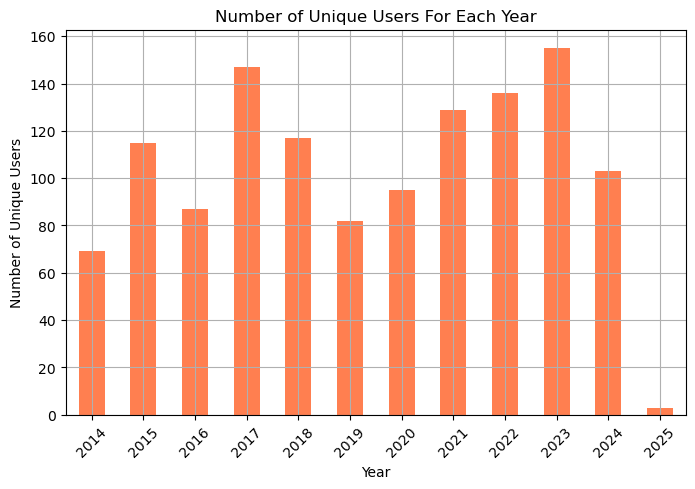

In [62]:
# Convert 'last_updated' to datetime format
df = verified_users_with_project.copy()
df['last_updated'] = pd.to_datetime(df['last_updated'])

 # Extract the year from 'last_updated'
df['year'] = df['last_updated'].dt.year
# Count the number of unique users per year
unique_users_by_year = df.groupby('year')['username'].nunique()

# Plot the number of unique users per year
plt.figure(figsize=(8, 5))
unique_users_by_year.plot(kind='bar', color='coral')
plt.title('Number of Unique Users For Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Find Top N User That Ran Any JOb

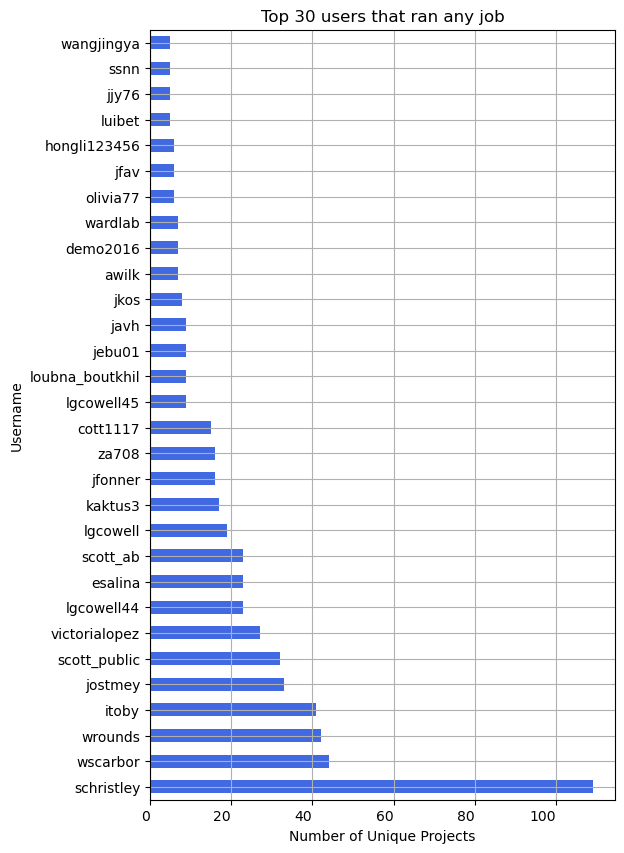

In [63]:

df = users_with_project_job_files.copy()
# number of unique users
n = 30
# Group by 'username' and count the number of unique 'id' (projects) each user has
user_unique_projects = df.groupby('username')['uuid'].nunique()
# Sort users by the number of unique projects (descending order)
top_n_users = user_unique_projects.sort_values(ascending=False).head(n)
# Plot the top 15 users with their unique number of projects
plt.figure(figsize=(6, 10))
top_n_users.plot(kind='barh', color='royalblue')
plt.title(f'Top {n} users that ran any job')
plt.ylabel('Username')
plt.xlabel('Number of Unique Projects')
plt.xticks(rotation=0, ha='right')
plt.grid(True)
plt.show()

## Histogram of Number of Jobs Associated with Each User

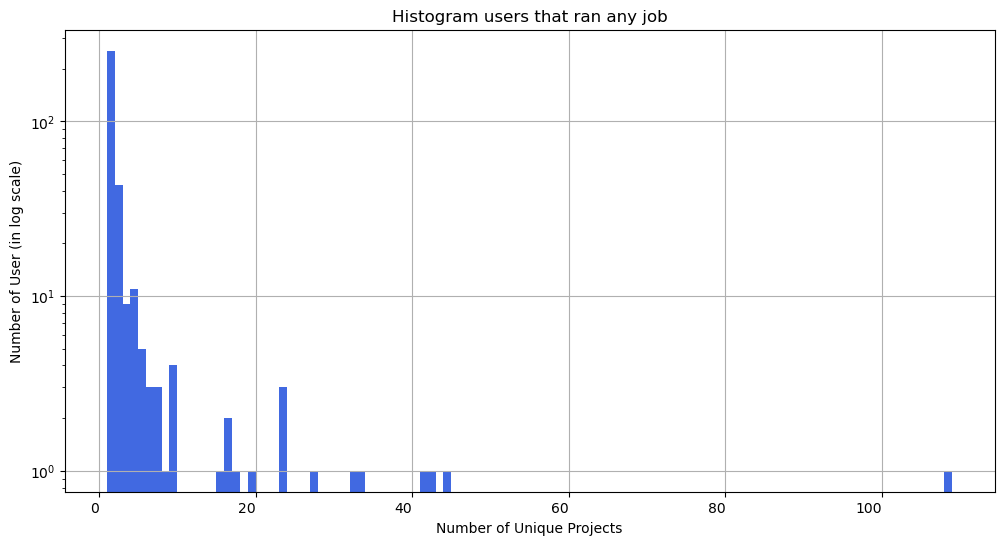

In [64]:

df = users_with_project_job_files.copy()
# number of unique users
n = 30
# Group by 'username' and count the number of unique 'id' (projects) each user has
user_unique_projects = df.groupby('username')['uuid'].nunique()
# Sort users by the number of unique projects (descending order)
top_n_users = user_unique_projects.sort_values(ascending=False)
# Plot the top 15 users with their unique number of projects
plt.figure(figsize=(12, 6))
top_n_users.plot(kind='hist', bins = 'fd', color='royalblue')
plt.title(f'Histogram users that ran any job')
plt.ylabel('Number of User (in log scale)')
plt.xlabel('Number of Unique Projects')
plt.xticks(rotation=0, ha='right')
plt.yscale('log')
plt.grid(True)
plt.show()

## Number of Projects Associated With Each User

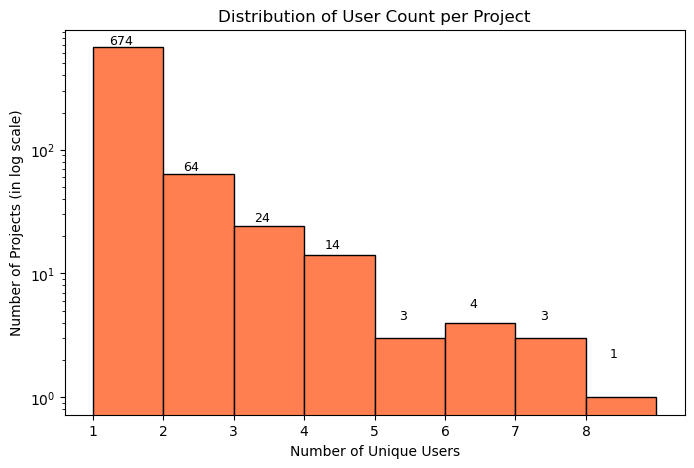

In [65]:
# Count unique users per project (uuid)
users_per_project = users_with_project_job_files.groupby('uuid')['username'].nunique()
# Step 2: Plot histogram
plt.figure(figsize=(8, 5))
bins = range(1, users_per_project.max() + 2)  # +2 to include the last bin
counts, edges, patches = plt.hist(users_per_project, bins=bins, color='coral', edgecolor='black')

# Step 3: Plot formatting
plt.title('Distribution of User Count per Project')
plt.xlabel('Number of Unique Users')
plt.ylabel('Number of Projects (in log scale)')
plt.xticks(range(1, users_per_project.max() + 1))
plt.yscale('log')

# Step 4: Add count labels on top of each bar
for count, edge in zip(counts, edges[:-1]):
    if count > 0:
        plt.text(edge + 0.4, count + 1, str(int(count)), ha='center', va='bottom', fontsize=9)

# Show the plot
plt.show()

## Number of Jobs Run Each Year

Number of unique JobUUID: 5087


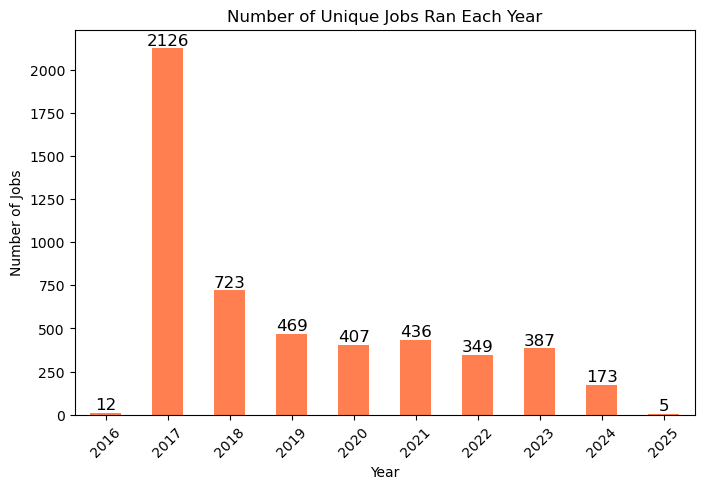

In [66]:

# Convert 'last_updated' to datetime format
df = df_projectJob.copy()
df = df[df.projectUuid.isin(job_files_with_verified_users.projectUuid)]
print(f'Number of unique JobUUID: {df.jobUuid.nunique()}')
## Filter the projectUUID by verified user

df['last_updated'] = pd.to_datetime(df['lastUpdated'], utc = True)
 # Extract the year from 'last_updated'
df['year'] = df['last_updated'].dt.year
# Count the number of unique users per year
unique_jobs_by_year = df.groupby('year')['jobUuid'].nunique()

# Plot the number of unique users per year
plt.figure(figsize=(8, 5))
ax = unique_jobs_by_year.plot(kind='bar', color='coral')
for i, value in enumerate(unique_jobs_by_year.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)
plt.title('Number of Unique Jobs Ran Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)

plt.show()

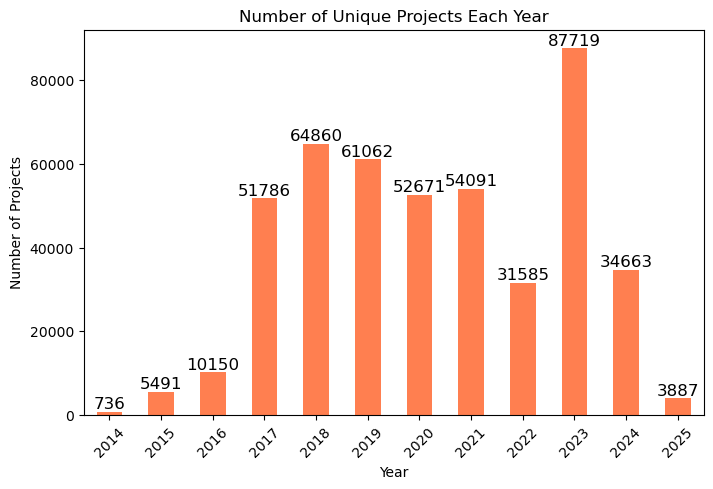

In [67]:
df = verified_users_with_project.copy()
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['year'] = df['last_updated'].dt.year
unique_projectes_created_each_year = df.groupby('year')['uuid'].nunique()
unique_projectes_created_each_year

# Plot the number of unique users per year
plt.figure(figsize=(8, 5))
ax = unique_projectes_created_each_year.plot(kind='bar', color='coral')
for i, value in enumerate(unique_projectes_created_each_year.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)
plt.title('Number of Unique Projects Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)

plt.show()

## Number of Projects Created Each Year

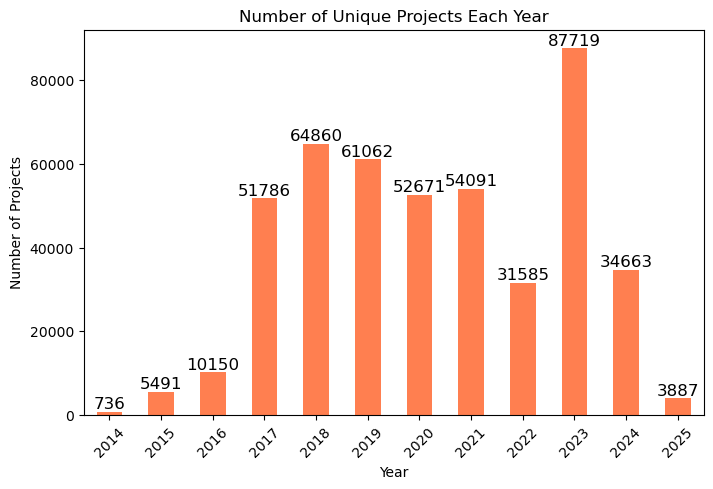

In [68]:
df = verified_users_with_project.copy()
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['year'] = df['last_updated'].dt.year
unique_projectes_created_each_year = df.groupby('year')['uuid'].nunique()
unique_projectes_created_each_year

# Plot the number of unique users per year
plt.figure(figsize=(8, 5))
ax = unique_projectes_created_each_year.plot(kind='bar', color='coral')
for i, value in enumerate(unique_projectes_created_each_year.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)
plt.title('Number of Unique Projects Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)

plt.show()

## Number of Projects Created Each Year That Ran any Job

Number of unique Projetcs: 784


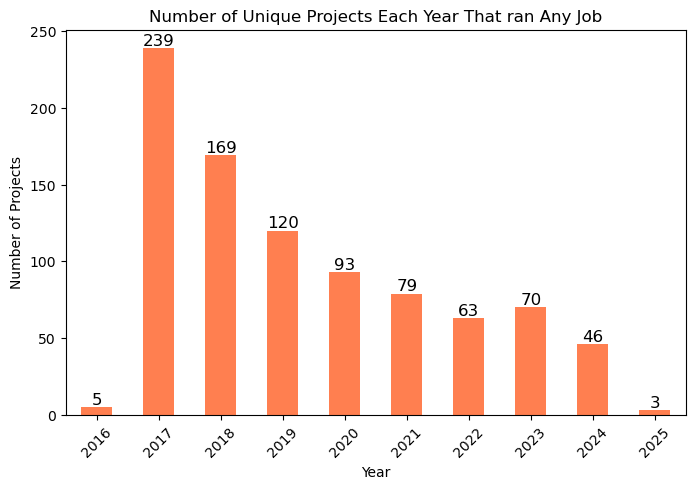

In [69]:
df = df_projectJob.copy()
df = df[df.projectUuid.isin(job_files_with_verified_users.projectUuid)]
print(f'Number of unique Projetcs: {df.projectUuid.nunique()}')
## Filter the projectUUID by verified user

df['last_updated'] = pd.to_datetime(df['lastUpdated'], utc = True)
 # Extract the year from 'last_updated'
df['year'] = df['last_updated'].dt.year
# Count the number of unique users per year
unique_jobs_by_year = df.groupby('year')['projectUuid'].nunique()

# Plot the number of unique users per year
plt.figure(figsize=(8, 5))
ax = unique_jobs_by_year.plot(kind='bar', color='coral')
for i, value in enumerate(unique_jobs_by_year.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)
plt.title('Number of Unique Projects Each Year That ran Any Job')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)

plt.show()

## Number of Files Associated With Each Project

Total number of project: 752
621.0


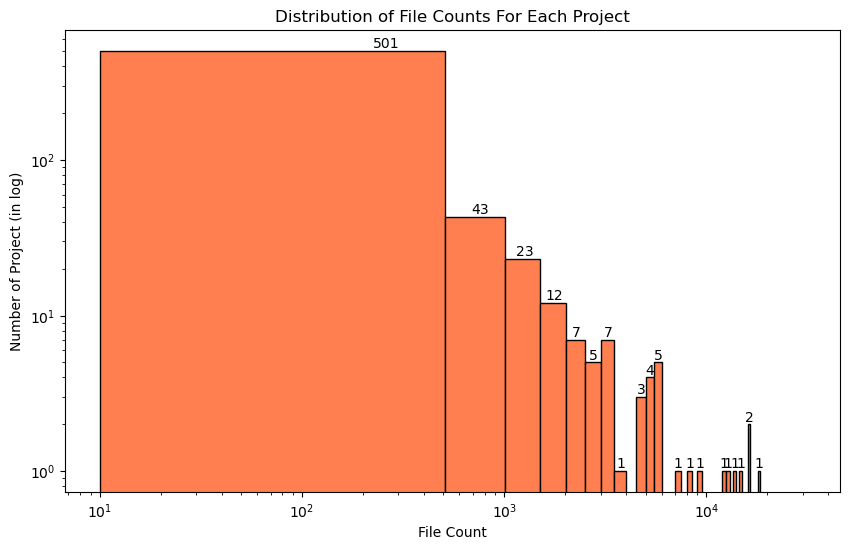

In [70]:

projectUuid_counts = job_files_with_verified_users.projectUuid.value_counts() 
print(f'Total number of project: {sum(projectUuid_counts>2)}')
plt.figure(figsize=(10, 6))
bins = 50
n, bins, patches = plt.hist(projectUuid_counts, bins=range(10, max(projectUuid_counts)+1, 500), color='coral', edgecolor='black')
print(sum(n))
# Add count labels on top of each bar
for i in range(len(patches)):
    height = patches[i].get_height()
    if height > 0:
        plt.text(patches[i].get_x() + patches[i].get_width() / 2, height,  # Offset for clarity
                 f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title('Distribution of File Counts For Each Project')
plt.xlabel('File Count')
plt.ylabel('Number of Project (in log)')
plt.yscale('log')
plt.xscale('log')

plt.show()


# Plot which country has how many Users

Total number of unique countries: 118


/home/s234499/miniforge3/envs/general_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s234499/miniforge3/envs/general_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


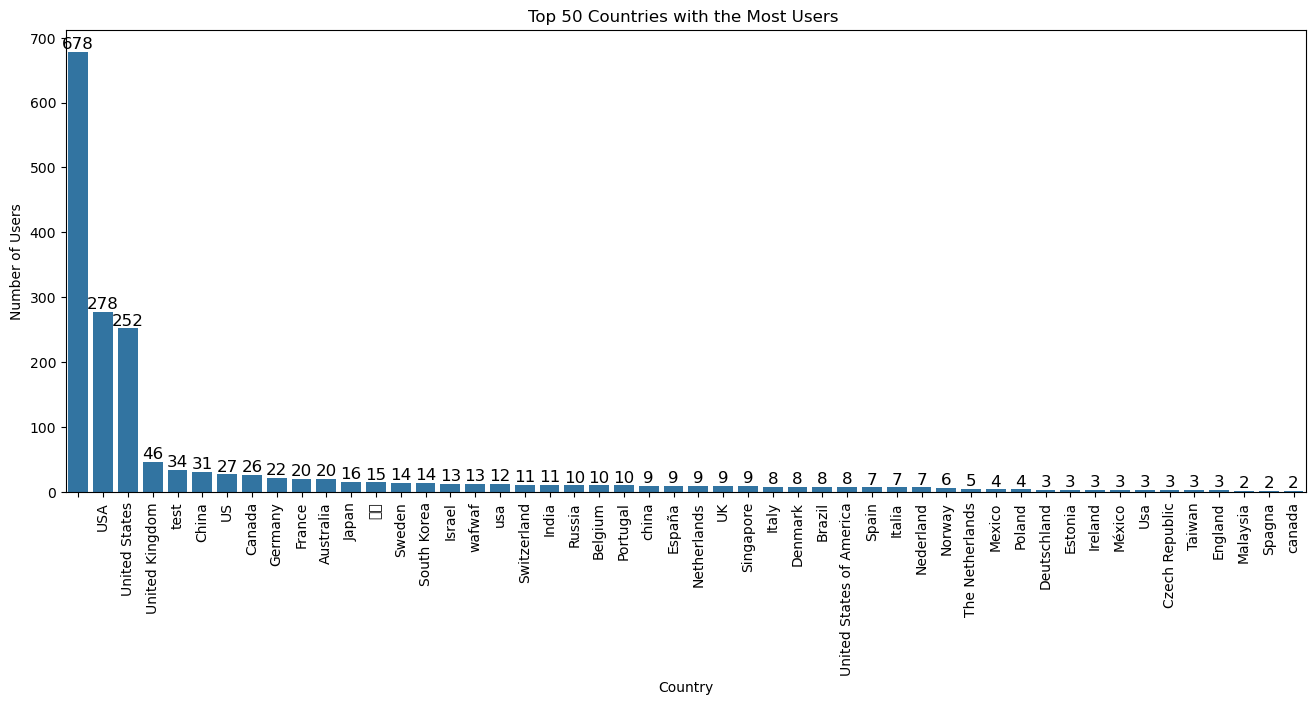

In [71]:
n = 50
df_filtered = df_profile[~df_profile['country'].str.contains(r'[^\w\s]', na=False)]
country_counts = df_filtered['country'].value_counts()
print(f'Total number of unique countries: {len(country_counts)}')
top_10_countries = country_counts.head(n)

# Plot the bar plot
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
for i, value in enumerate(top_10_countries.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)
# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.title(f'Top {n} Countries with the Most Users ')

# Display the plot
plt.xticks(rotation=90)

plt.show()

## Look at Metadata Permission File (UUID is projectUUID)

In [72]:
metadata_perms_df
##
# metadata_perms_df[(metadata_perms_df['permission'] == 'READ_WRITE')].value_counts('username')

id         last_updated  permission         username  \
0             5  2014-01-21 17:00:11  READ_WRITE            test3   
1             6  2014-01-21 17:00:41  READ_WRITE            test4   
2             9  2014-01-21 17:21:43  READ_WRITE           test11   
3            14  2014-01-29 10:28:16  READ_WRITE          jfonner   
4            17  2014-01-29 14:06:38  READ_WRITE  adshkl;dasfhkdf   
...         ...                  ...         ...              ...   
760590  1444986  2025-01-25 09:44:43  READ_WRITE       schristley   
760591  1444987  2025-01-25 09:44:44  READ_WRITE       schristley   
760592  1444988  2025-01-25 09:44:44  READ_WRITE       schristley   
760593  1444989  2025-01-25 09:44:44  READ_WRITE       schristley   
760594  1444990  2025-01-25 09:44:44  READ_WRITE       schristley   

                                         uuid      tenant_id  
0        0001389977207738-5056a550b8-0001-012  vdjserver.org  
1        0001389977207738-5056a550b8-0001-012  vdjserver.org  
2        0001389977207738-5056a550b8-0001-012  vdjserver.org  
3        0001389977207738-5056a550b8-0001-012  vdjserver.org  
4        0001391025968832-5056a550b8-0001-012  vdjserver.org  
...                                       ...            ...  
760590  3580715269144908271-242ac118-0001-012  vdjserver.org  
760591  3569118857445708271-242ac118-0001-012  vdjserver.org  
760592  3557565395419468271-242ac118-0001-012  vdjserver.org  
760593  3547300423582028271-242ac118-0001-012  vdjserver.org  
760594  3534544370712908271-242ac118-0001-012  vdjserver.org  

[760595 rows x 6 columns]

## Look at All the Jobs at VDJ Server

In [73]:
jobs_all_df.head()
## Filter AllJobs columns
#### Keeping only important ones
keep_columns = ['system_id', 'owner', 'app_id', 'status', 'last_updated', 'uuid', 'archive_path', 'remote_outcome', 'update_token', 'parameters.Creator']
jobs_all_df = jobs_all_df[keep_columns]
jobs_all_df

system_id    owner                app_id    status  \
0      ls6.tacc.utexas.edu      vdj     repcalc-ls6-2.0u8  FINISHED   
1      ls6.tacc.utexas.edu      vdj    igblast-ls6-1.20u6  FINISHED   
2      ls6.tacc.utexas.edu      vdj    igblast-ls6-1.20u6    FAILED   
3      ls6.tacc.utexas.edu      vdj  vdj_pipe-ls6-0.1.7u2  FINISHED   
4      ls6.tacc.utexas.edu      vdj  vdj_pipe-ls6-0.1.7u2  FINISHED   
...                    ...      ...                   ...       ...   
15776          my-lonestar  jfonner     my-vdj_pipe-0.0.4  FINISHED   
15777          my-lonestar  jfonner     my-vdj_pipe-0.0.4  FINISHED   
15778          my-lonestar  jfonner     my-vdj_pipe-0.0.4  FINISHED   
15779          my-lonestar  jfonner     my-vdj_pipe-0.0.4    FAILED   
15780          my-lonestar  jfonner     my-vdj_pipe-0.0.4    FAILED   

                  last_updated                                      uuid  \
0      2025-01-25 15:43:51.678  c7cd08ad-a560-4574-a363-b9cc4c5e051d-007   
1      2025-01-24 04:20:37.891  9188bf80-e868-4e05-a6b4-308c044108d7-007   
2      2025-01-22 15:04:46.891  773a5cb7-b369-4517-a221-83d57e3899e5-007   
3      2025-01-14 22:31:02.980  c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007   
4      2025-01-09 04:21:12.476  ad02cb34-250e-48cb-a06e-973e431b62ee-007   
...                        ...                                       ...   
15776  2014-03-31 16:38:39.000      0001396301879424-5056a550b8-0001-007   
15777  2014-03-31 15:44:00.000      0001396298592090-5056a550b8-0001-007   
15778  2014-03-31 15:35:18.000      0001396298085562-5056a550b8-0001-007   
15779  2014-03-31 15:28:36.000      0001396297676287-5056a550b8-0001-007   
15780  2014-03-31 14:50:18.000      0001396295290656-5056a550b8-0001-007   

                                            archive_path       remote_outcome  \
0      /projects/5456400192359305711-242ac118-0001-01...             FINISHED   
1      /projects/5456400192359305711-242ac118-0001-01...             FINISHED   
2      /projects/5199144433477554666-242ac116-0001-01...  FAILED_SKIP_ARCHIVE   
3      /projects/5456400192359305711-242ac118-0001-01...             FINISHED   
4      /projects/6589143665654501871-242ac118-0001-01...             FINISHED   
...                                                  ...                  ...   
15776  /scratch/01114/jfonner/vdj/analyses/foo123-201...             FINISHED   
15777  /scratch/01114/jfonner/vdj/analyses/vdj_test20...             FINISHED   
15778  /scratch/01114/jfonner/vdj/analyses/vdj_test20...             FINISHED   
15779  /scratch/01114/jfonner/vdj/analyses/vdj_test20...               FAILED   
15780  /scratch/01114/jfonner/vdj/analyses/vdj_test20...               FAILED   

                               update_token parameters.Creator  
0      eb27e311-4a37-4aeb-b649-056704dd2711         schristley  
1      5e2528fd-25d6-4473-9287-6a67a8de8391         schristley  
2      78b89c14-3dec-4aa8-acf8-d2592064e3a4       scott_public  
3      1e2f122d-5e5b-4f14-931f-ca55803115ff         schristley  
4      1069949d-1d9a-453f-80b8-7372019aba31         schristley  
...                                     ...                ...  
15776  3b188d18-7955-49b6-bc21-10a557ced542                NaN  
15777  c9dd99e9-2ef2-4fd7-b211-26b56162b21e                NaN  
15778  282196b2-9972-4615-944d-777e1ee7826c                NaN  
15779  dc81e8a3-9869-47cc-8bee-3d254bb805d1                NaN  
15780  08f920a6-e4c1-4029-9ac2-e1de96e7d23a                NaN  

[15781 rows x 10 columns]

In [74]:
jobs_all_df[jobs_all_df.uuid == '8144122141623652841-242ac11c-0001-007']

system_id owner           app_id    status  \
9999  ls5.tacc.utexas.edu   vdj  repcalc-ls5-1.0  FINISHED   

                 last_updated                                   uuid  \
9999  2019-02-27 18:42:14.000  8144122141623652841-242ac11c-0001-007   

                                           archive_path remote_outcome  \
9999  /projects/7058216970366620136-242ac11e-0001-01...       FINISHED   

                              update_token parameters.Creator  
9999  fd7354e7-729c-4b42-97b6-2a9dd08bf0a0         schristley

## Look at JobEvents

In [75]:
job_events_df

id              created created_by  \
0           5476  2014-03-31 14:48:10    jfonner   
1           5477  2014-03-31 14:48:20    jfonner   
2           5478  2014-03-31 14:48:30    jfonner   
3           5479  2014-03-31 14:50:18    jfonner   
4           5480  2014-03-31 15:27:56    jfonner   
...          ...                  ...        ...   
341856  23585802  2025-01-25 15:38:25        vdj   
341857  23585803  2025-01-25 15:43:33        vdj   
341858  23585804  2025-01-25 15:43:33        vdj   
341859  23585805  2025-01-25 15:43:37        vdj   
341860  23585806  2025-01-25 15:43:52        vdj   

                                              description      ip_address  \
0                 Job accepted and queued for submission.  129.114.60.167   
1           No inputs for the given job. Skipping staging  129.114.60.167   
2       Attempt [1] Preparing job for execution and st...  129.114.60.167   
3       Failed to submit job 0001396295290656-5056a550...  129.114.60.167   
4                 Job accepted and queued for submission.  129.114.60.167   
...                                                   ...             ...   
341856                    Job running on execution system      172.17.0.5   
341857                            Job completed execution      172.17.0.5   
341858          Transferring job output to archive system      172.17.0.5   
341859  Job archiving in progress: agave://ls6.tacc.ut...      172.17.0.5   
341860                         Job completed successfully      172.17.0.5   

             status      tenant_id  job_id  transfertask  \
0           PENDING  vdjserver.org     142           NaN   
1            STAGED  vdjserver.org     142           NaN   
2        SUBMITTING  vdjserver.org     142           NaN   
3            FAILED  vdjserver.org     142           NaN   
4           PENDING  vdjserver.org     143           NaN   
...             ...            ...     ...           ...   
341856      RUNNING  vdjserver.org  503865           0.0   
341857  CLEANING_UP  vdjserver.org  503865           0.0   
341858    ARCHIVING  vdjserver.org  503865           0.0   
341859    ARCHIVING  vdjserver.org  503865   560378724.0   
341860     FINISHED  vdjserver.org  503865           0.0   

                                            uuid  
0                                           None  
1                                           None  
2                                           None  
3                                           None  
4                                           None  
...                                          ...  
341856  64c47eaa-102e-4106-bae7-4af2b2a3e3a0-028  
341857  b62a2f3c-b5f6-4ba7-b764-e49091263b76-028  
341858  09c31ec9-7736-4d8a-a4dd-ead09386eea1-028  
341859  d0d6f978-8813-4829-abe0-ce78c5dd326e-028  
341860  f93fc121-4027-4e5f-a654-32b7df137a94-028  

[341861 rows x 10 columns]

## Filter Metadata file by removing users with only READ Acess and Usernames that contains test

In [76]:
metadata_perms_df
#filter metadata keeping only items that has permission for both READ_WRITE and ALL
filtered_metadata_perms_df = metadata_perms_df[~(metadata_perms_df.permission == 'READ')]
# Filter out usernames containing 'test'
filtered_metadata_perms_df = filtered_metadata_perms_df[~filtered_metadata_perms_df['username'].str.contains('test', case=False)]

## Plot Number of Unique Users for Each Year

year
2014      741
2015     5495
2016    10172
2017    51812
2018    65288
2019    61059
2020    52641
2021    54077
2022    31584
2023    87717
2024    34663
2025     3887
Name: uuid, dtype: int64


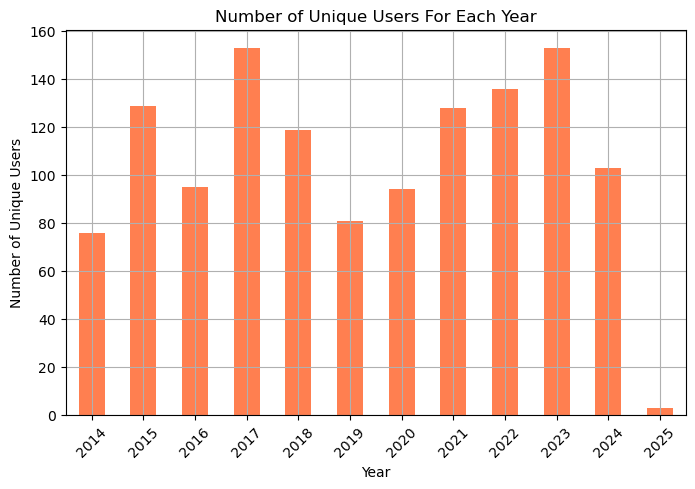

In [77]:
# Convert 'last_updated' to datetime format
df = filtered_metadata_perms_df
df['last_updated'] = pd.to_datetime(df['last_updated'])

 # Extract the year from 'last_updated'
df['year'] = df['last_updated'].dt.year

print(df.groupby('year')['uuid'].nunique())
# Count the number of unique users per year
unique_users_by_year = df.groupby('year')['username'].nunique()

# Plot the number of unique users per year
plt.figure(figsize=(8, 5))
unique_users_by_year.plot(kind='bar', color='coral')
plt.title('Number of Unique Users For Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Plot Top n Users with Unique Projects

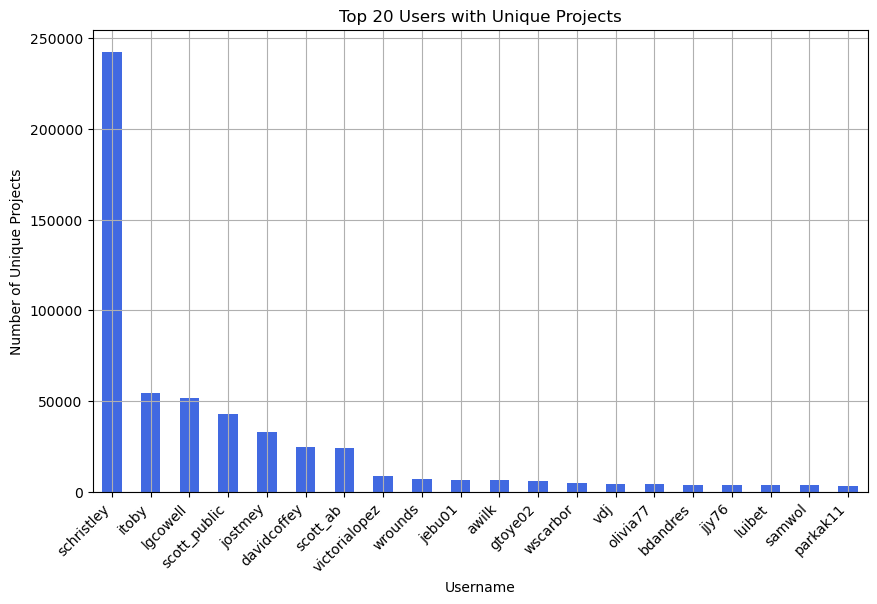

In [78]:
# number of unique users
n = 20
# Group by 'username' and count the number of unique 'id' (projects) each user has
user_unique_projects = df.groupby('username')['uuid'].nunique()
# Sort users by the number of unique projects (descending order)
top_n_users = user_unique_projects.sort_values(ascending=False).head(n)
# Plot the top 15 users with their unique number of projects
plt.figure(figsize=(10, 6))
top_n_users.plot(kind='bar', color='royalblue')
plt.title(f'Top {n} Users with Unique Projects')
plt.xlabel('Username')
plt.ylabel('Number of Unique Projects')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()



 ## Plot the Top n Users by Number of Projects in a Year

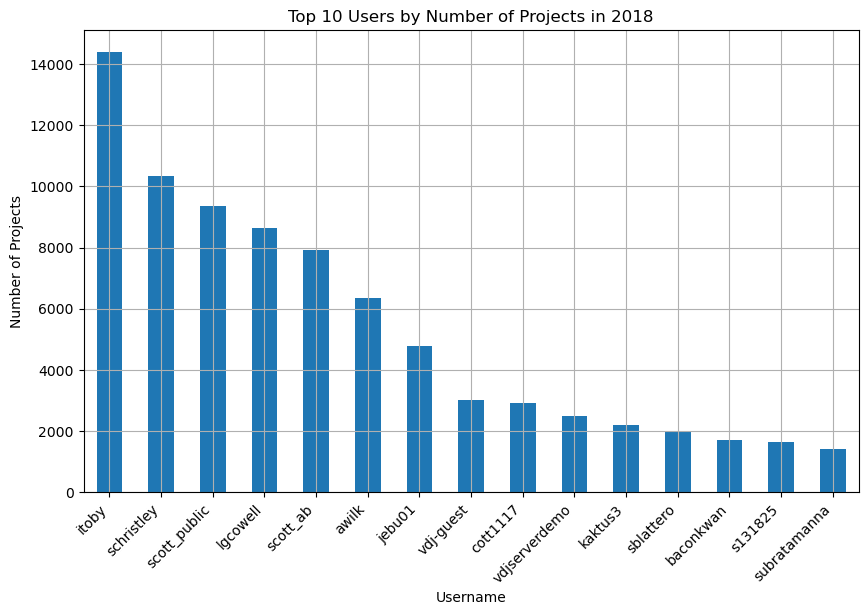

In [79]:

# number of unique users
n = 20# Filter the dataframe for a specific year, e.g., 2014
year_of_interest = 2018
# Group by 'username' and 'year' and count the number of records for each user in the specified year
user_project_counts = df[df['year'] == year_of_interest].groupby('username').size()

# Sort the users by the number of projects (in descending order)
top_15_users = user_project_counts.sort_values(ascending=False).head(15)

# Plot the top 10 users based on the number of projects (or records)
plt.figure(figsize=(10, 6))
top_15_users.plot(kind='bar')
plt.title(f'Top 10 Users by Number of Projects in {year_of_interest}')
plt.xlabel('Username')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## For each Project How many Jobs are there?

In [80]:
df_projectJob

uuid owner  \
0      0001400192074855-5056a550b8-0001-012   vdj   
1      0001400254373114-5056a550b8-0001-012   vdj   
2      0001400273862423-5056a550b8-0001-012   vdj   
3      0001400274448495-5056a550b8-0001-012   vdj   
4      0001400274714655-5056a550b8-0001-012   vdj   
...                                     ...   ...   
6350  5097479121213854191-242ac118-0001-012   vdj   
6351  1948444895656078865-242ac118-0001-012   vdj   
6352  1819643224410746385-242ac118-0001-012   vdj   
6353  2845695380777266705-242ac118-0001-012   vdj   
6354  3203620026767118831-242ac118-0001-012   vdj   

                                projectUuid  \
0      0001399309581559-5056a550b8-0001-012   
1      0001400250478554-5056a550b8-0001-012   
2      0001400250478554-5056a550b8-0001-012   
3      0001400250478554-5056a550b8-0001-012   
4      0001400250478554-5056a550b8-0001-012   
...                                     ...   
6350  6589143665654501871-242ac118-0001-012   
6351  5456400192359305711-242ac118-0001-012   
6352  5199144433477554666-242ac116-0001-012   
6353  5456400192359305711-242ac118-0001-012   
6354  5456400192359305711-242ac118-0001-012   

                                       jobUuid                    lastUpdated  
0         0001399315558601-5056a550b8-0001-007  2014-05-15T17:14:34.855-05:00  
1         0001400254372814-5056a550b8-0001-007  2014-05-16T10:32:53.114-05:00  
2         0001400273862119-5056a550b8-0001-007  2014-05-16T15:57:42.423-05:00  
3         0001400274448320-5056a550b8-0001-007  2014-05-16T16:07:28.494-05:00  
4         0001400274714490-5056a550b8-0001-007  2014-05-16T16:11:54.655-05:00  
...                                        ...                            ...  
6350  ad02cb34-250e-48cb-a06e-973e431b62ee-007  2025-01-08T12:13:35.460-06:00  
6351  c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007  2025-01-13T16:44:05.995-06:00  
6352  773a5cb7-b369-4517-a221-83d57e3899e5-007  2025-01-20T03:06:57.762-06:00  
6353  9188bf80-e868-4e05-a6b4-308c044108d7-007  2025-01-23T15:05:59.570-06:00  
6354  c7cd08ad-a560-4574-a363-b9cc4c5e051d-007  2025-01-24T20:57:54.599-06:00  

[6355 rows x 5 columns]

In [81]:
print(f'Total number of ProjectJob: \t\t\t\t{df_projectJob.shape[0]}')
print(f'Total number of Unique projectUuid: \t\t\t{df_projectJob.projectUuid.nunique()}')

#Filter projectJob Based on Metadata permission file
filtered_df_projectJob = df_projectJob[df_projectJob.projectUuid.isin(filtered_metadata_perms_df['uuid'])]
print(f'Total number of Unique projectUuid after filtration: \t{filtered_df_projectJob.projectUuid.nunique()}')

filtered_df_projectJob

Total number of ProjectJob: 				6355
Total number of Unique projectUuid: 			1086
Total number of Unique projectUuid after filtration: 	890


uuid owner  \
36     0001402415655966-5056a550b8-0001-012   vdj   
37     0001402584065947-5056a550b8-0001-012   vdj   
64     0001404239409839-5056a550b8-0001-012   vdj   
157    0001410472799189-5056a550b8-0001-012   vdj   
214    0001415039388759-5056a550b8-0001-012   vdj   
...                                     ...   ...   
6350  5097479121213854191-242ac118-0001-012   vdj   
6351  1948444895656078865-242ac118-0001-012   vdj   
6352  1819643224410746385-242ac118-0001-012   vdj   
6353  2845695380777266705-242ac118-0001-012   vdj   
6354  3203620026767118831-242ac118-0001-012   vdj   

                                projectUuid  \
36     0001402413135675-5056a550b8-0001-012   
37     0001402413135675-5056a550b8-0001-012   
64     0001402413135675-5056a550b8-0001-012   
157    0001410472310261-5056a550b8-0001-012   
214    0001415029221897-5056a550b8-0001-012   
...                                     ...   
6350  6589143665654501871-242ac118-0001-012   
6351  5456400192359305711-242ac118-0001-012   
6352  5199144433477554666-242ac116-0001-012   
6353  5456400192359305711-242ac118-0001-012   
6354  5456400192359305711-242ac118-0001-012   

                                       jobUuid                    lastUpdated  
36        0001402415655772-5056a550b8-0001-007  2017-01-12T17:35:19.626-06:00  
37        0001402584065562-5056a550b8-0001-007  2017-01-12T17:35:16.665-06:00  
64        0001404239409637-5056a550b8-0001-007  2017-01-12T17:35:13.705-06:00  
157       0001410472799004-5056a550b8-0001-007  2017-01-12T17:36:48.130-06:00  
214       0001415039388481-5056a550b8-0001-007  2017-01-12T17:37:17.842-06:00  
...                                        ...                            ...  
6350  ad02cb34-250e-48cb-a06e-973e431b62ee-007  2025-01-08T12:13:35.460-06:00  
6351  c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007  2025-01-13T16:44:05.995-06:00  
6352  773a5cb7-b369-4517-a221-83d57e3899e5-007  2025-01-20T03:06:57.762-06:00  
6353  9188bf80-e868-4e05-a6b4-308c044108d7-007  2025-01-23T15:05:59.570-06:00  
6354  c7cd08ad-a560-4574-a363-b9cc4c5e051d-007  2025-01-24T20:57:54.599-06:00  

[5505 rows x 5 columns]

## Number of Unique ProjectUUID Each Year for filtered_df_projectJob

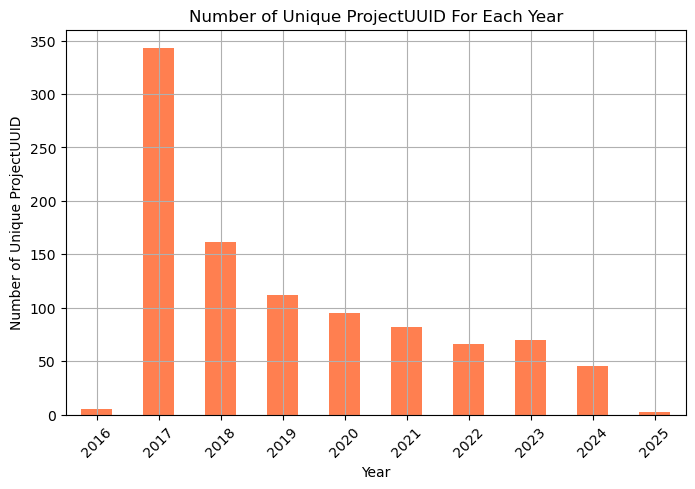

In [82]:
df = filtered_df_projectJob.copy()
df['lastUpdated'] = pd.to_datetime(df['lastUpdated'],  utc=True)
 # Extract the year from 'last_updated'
df['lastUpdated'] = df['lastUpdated'].dt.year
#Count the number of unique users per year
unique_users_by_year = df.groupby('lastUpdated')['projectUuid'].nunique()
# Plot the number of unique users per year
plt.figure(figsize=(8, 5))
unique_users_by_year.plot(kind='bar', color='coral')
plt.title('Number of Unique ProjectUUID For Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique ProjectUUID')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [84]:
# # number of unique users
# n = 20
# # Group by 'username' and count the number of unique 'id' (projects) each user has
# user_unique_projects = filtered_df_projectJob.groupby('username')['uuid'].nunique()
# # Sort users by the number of unique projects (descending order)
# top_n_users = user_unique_projects.sort_values(ascending=False).head(n)
# # Plot the top 15 users with their unique number of projects
# plt.figure(figsize=(10, 6))
# top_n_users.plot(kind='bar', color='royalblue')
# plt.title(f'Top {n} Users with Unique Projects')
# plt.xlabel('Username')
# plt.ylabel('Number of Unique Projects')
# plt.xticks(rotation=45, ha='right')
# plt.grid(True)
# plt.show()

In [85]:
df_projectJob.projectUuid.value_counts()

projectUuid
0001430750947192-5056a550b8-0001-012     121
3057760388135251475-242ac11a-0001-012    114
0001428091338341-5056a550b8-0001-012     103
5199144433477554666-242ac116-0001-012    100
46850669884665370-242ac114-0001-012       73
                                        ... 
8068155099655311846-242ac11c-0001-012      1
5211345989129277926-242ac11c-0001-012      1
7349712692870124006-242ac11c-0001-012      1
7671983811578696166-242ac11c-0001-012      1
4542076765918597606-242ac11c-0001-012      1
Name: count, Length: 1086, dtype: int64

In [86]:
filtered_projectFiles = df_projectFiles[df_projectFiles.projectUuid.isin(filtered_metadata_perms_df['uuid'])]
filtered_projectFiles

uuid  \
1       0001396029083309-5056a550b8-0001-012   
2       0001396029805022-5056a550b8-0001-012   
3       0001396030144907-5056a550b8-0001-012   
4       0001396039988083-5056a550b8-0001-012   
5       0001396043273330-5056a550b8-0001-012   
...                                      ...   
35943  5338423137409494545-242ac118-0001-012   
35944  1335427718191574545-242ac118-0001-012   
35945  1840700597200490991-242ac118-0001-012   
35946  5023614960920170991-242ac118-0001-012   
35947  7830832104257678865-242ac118-0001-012   

                                 projectUuid  \
1       0001395346788177-5056a550b8-0001-012   
2       0001395346788177-5056a550b8-0001-012   
3       0001395346788177-5056a550b8-0001-012   
4       0001395346788177-5056a550b8-0001-012   
5       0001395346788177-5056a550b8-0001-012   
...                                      ...   
35943  5456400192359305711-242ac118-0001-012   
35944  5456400192359305711-242ac118-0001-012   
35945  5456400192359305711-242ac118-0001-012   
35946  5456400192359305711-242ac118-0001-012   
35947  5456400192359305711-242ac118-0001-012   

                            associationIds_1  \
1       0001395939852441-5056a550b8-0001-002   
2       0001395956517022-5056a550b8-0001-002   
3       0001396030144691-5056a550b8-0001-002   
4       0001396039987794-5056a550b8-0001-002   
5       0001396043273029-5056a550b8-0001-002   
...                                      ...   
35943  6793987554023894545-242ac112-0001-002   
35944  2833383462017494545-242ac112-0001-002   
35945   366925519251050991-242ac112-0001-002   
35946  3549539235260010991-242ac112-0001-002   
35947  8017190735231118865-242ac112-0001-002   

                            associationIds_2    owner task_type  \
1                                       None  vdjauth  uploaded   
2                                       None  vdjauth  uploaded   
3                                       None  vdjauth  uploaded   
4                                       None  vdjauth  uploaded   
5                                       None  vdjauth  uploaded   
...                                      ...      ...       ...   
35943  5456400192359305711-242ac118-0001-012      vdj      None   
35944  5456400192359305711-242ac118-0001-012      vdj      None   
35945  5456400192359305711-242ac118-0001-012      vdj      None   
35946  5456400192359305711-242ac118-0001-012      vdj      None   
35947  5456400192359305711-242ac118-0001-012      vdj      None   

                           file_name         mimeType  \
1                 gitprep-latest.zip  application/zip   
2                   Induction-28.zip  application/zip   
3                         test10.txt       text/plain   
4                         test11.txt       text/plain   
5                         test14.txt       text/plain   
...                              ...              ...   
35943  4468_S24_L001_R1_001.fastq.gz             None   
35944  4468_S24_L001_R2_001.fastq.gz             None   
35945  6634_S25_L001_R1_001.fastq.gz             None   
35946  6634_S25_L001_R2_001.fastq.gz             None   
35947                  primers.fasta             None   

                        last_updated  
1      2014-03-28T12:51:23.309-05:00  
2      2014-03-28T13:03:25.022-05:00  
3      2014-03-28T13:09:04.907-05:00  
4      2014-03-28T15:53:08.083-05:00  
5      2014-03-28T16:47:53.330-05:00  
...                              ...  
35943  2025-01-13T16:40:40.230-06:00  
35944  2025-01-13T16:40:40.230-06:00  
35945  2025-01-13T16:40:43.277-06:00  
35946  2025-01-13T16:40:43.281-06:00  
35947  2025-01-13T16:41:49.035-06:00  

[29194 rows x 9 columns]

In [87]:
df_projectFiles.task_type.nunique()
df_projectFiles.associationIds_1.nunique()
df_projectFiles.projectUuid.value_counts()
df_projectFiles

uuid  \
0       0001395955349445-5056a550b8-0001-012   
1       0001396029083309-5056a550b8-0001-012   
2       0001396029805022-5056a550b8-0001-012   
3       0001396030144907-5056a550b8-0001-012   
4       0001396039988083-5056a550b8-0001-012   
...                                      ...   
35943  5338423137409494545-242ac118-0001-012   
35944  1335427718191574545-242ac118-0001-012   
35945  1840700597200490991-242ac118-0001-012   
35946  5023614960920170991-242ac118-0001-012   
35947  7830832104257678865-242ac118-0001-012   

                                 projectUuid  \
0                                              
1       0001395346788177-5056a550b8-0001-012   
2       0001395346788177-5056a550b8-0001-012   
3       0001395346788177-5056a550b8-0001-012   
4       0001395346788177-5056a550b8-0001-012   
...                                      ...   
35943  5456400192359305711-242ac118-0001-012   
35944  5456400192359305711-242ac118-0001-012   
35945  5456400192359305711-242ac118-0001-012   
35946  5456400192359305711-242ac118-0001-012   
35947  5456400192359305711-242ac118-0001-012   

                            associationIds_1  \
0                                       None   
1       0001395939852441-5056a550b8-0001-002   
2       0001395956517022-5056a550b8-0001-002   
3       0001396030144691-5056a550b8-0001-002   
4       0001396039987794-5056a550b8-0001-002   
...                                      ...   
35943  6793987554023894545-242ac112-0001-002   
35944  2833383462017494545-242ac112-0001-002   
35945   366925519251050991-242ac112-0001-002   
35946  3549539235260010991-242ac112-0001-002   
35947  8017190735231118865-242ac112-0001-002   

                            associationIds_2    owner task_type  \
0                                       None  vdjauth             
1                                       None  vdjauth  uploaded   
2                                       None  vdjauth  uploaded   
3                                       None  vdjauth  uploaded   
4                                       None  vdjauth  uploaded   
...                                      ...      ...       ...   
35943  5456400192359305711-242ac118-0001-012      vdj      None   
35944  5456400192359305711-242ac118-0001-012      vdj      None   
35945  5456400192359305711-242ac118-0001-012      vdj      None   
35946  5456400192359305711-242ac118-0001-012      vdj      None   
35947  5456400192359305711-242ac118-0001-012      vdj      None   

                           file_name         mimeType  \
0                               None             None   
1                 gitprep-latest.zip  application/zip   
2                   Induction-28.zip  application/zip   
3                         test10.txt       text/plain   
4                         test11.txt       text/plain   
...                              ...              ...   
35943  4468_S24_L001_R1_001.fastq.gz             None   
35944  4468_S24_L001_R2_001.fastq.gz             None   
35945  6634_S25_L001_R1_001.fastq.gz             None   
35946  6634_S25_L001_R2_001.fastq.gz             None   
35947                  primers.fasta             None   

                        last_updated  
0      2014-03-27T16:22:29.444-05:00  
1      2014-03-28T12:51:23.309-05:00  
2      2014-03-28T13:03:25.022-05:00  
3      2014-03-28T13:09:04.907-05:00  
4      2014-03-28T15:53:08.083-05:00  
...                              ...  
35943  2025-01-13T16:40:40.230-06:00  
35944  2025-01-13T16:40:40.230-06:00  
35945  2025-01-13T16:40:43.277-06:00  
35946  2025-01-13T16:40:43.281-06:00  
35947  2025-01-13T16:41:49.035-06:00  

[35948 rows x 9 columns]

In [88]:
filtered_df_projectFiles = df_projectFiles[df_projectFiles.projectUuid.isin(filtered_metadata_perms_df['uuid'])]
filtered_df_projectFiles

uuid  \
1       0001396029083309-5056a550b8-0001-012   
2       0001396029805022-5056a550b8-0001-012   
3       0001396030144907-5056a550b8-0001-012   
4       0001396039988083-5056a550b8-0001-012   
5       0001396043273330-5056a550b8-0001-012   
...                                      ...   
35943  5338423137409494545-242ac118-0001-012   
35944  1335427718191574545-242ac118-0001-012   
35945  1840700597200490991-242ac118-0001-012   
35946  5023614960920170991-242ac118-0001-012   
35947  7830832104257678865-242ac118-0001-012   

                                 projectUuid  \
1       0001395346788177-5056a550b8-0001-012   
2       0001395346788177-5056a550b8-0001-012   
3       0001395346788177-5056a550b8-0001-012   
4       0001395346788177-5056a550b8-0001-012   
5       0001395346788177-5056a550b8-0001-012   
...                                      ...   
35943  5456400192359305711-242ac118-0001-012   
35944  5456400192359305711-242ac118-0001-012   
35945  5456400192359305711-242ac118-0001-012   
35946  5456400192359305711-242ac118-0001-012   
35947  5456400192359305711-242ac118-0001-012   

                            associationIds_1  \
1       0001395939852441-5056a550b8-0001-002   
2       0001395956517022-5056a550b8-0001-002   
3       0001396030144691-5056a550b8-0001-002   
4       0001396039987794-5056a550b8-0001-002   
5       0001396043273029-5056a550b8-0001-002   
...                                      ...   
35943  6793987554023894545-242ac112-0001-002   
35944  2833383462017494545-242ac112-0001-002   
35945   366925519251050991-242ac112-0001-002   
35946  3549539235260010991-242ac112-0001-002   
35947  8017190735231118865-242ac112-0001-002   

                            associationIds_2    owner task_type  \
1                                       None  vdjauth  uploaded   
2                                       None  vdjauth  uploaded   
3                                       None  vdjauth  uploaded   
4                                       None  vdjauth  uploaded   
5                                       None  vdjauth  uploaded   
...                                      ...      ...       ...   
35943  5456400192359305711-242ac118-0001-012      vdj      None   
35944  5456400192359305711-242ac118-0001-012      vdj      None   
35945  5456400192359305711-242ac118-0001-012      vdj      None   
35946  5456400192359305711-242ac118-0001-012      vdj      None   
35947  5456400192359305711-242ac118-0001-012      vdj      None   

                           file_name         mimeType  \
1                 gitprep-latest.zip  application/zip   
2                   Induction-28.zip  application/zip   
3                         test10.txt       text/plain   
4                         test11.txt       text/plain   
5                         test14.txt       text/plain   
...                              ...              ...   
35943  4468_S24_L001_R1_001.fastq.gz             None   
35944  4468_S24_L001_R2_001.fastq.gz             None   
35945  6634_S25_L001_R1_001.fastq.gz             None   
35946  6634_S25_L001_R2_001.fastq.gz             None   
35947                  primers.fasta             None   

                        last_updated  
1      2014-03-28T12:51:23.309-05:00  
2      2014-03-28T13:03:25.022-05:00  
3      2014-03-28T13:09:04.907-05:00  
4      2014-03-28T15:53:08.083-05:00  
5      2014-03-28T16:47:53.330-05:00  
...                              ...  
35943  2025-01-13T16:40:40.230-06:00  
35944  2025-01-13T16:40:40.230-06:00  
35945  2025-01-13T16:40:43.277-06:00  
35946  2025-01-13T16:40:43.281-06:00  
35947  2025-01-13T16:41:49.035-06:00  

[29194 rows x 9 columns]

In [89]:
df_projectFiles.projectUuid.nunique()

1916

In [90]:
filtered_df_projectFiles.projectUuid.nunique()

1223

In [91]:
filtered_jobs_all_df = jobs_all_df[jobs_all_df.uuid.isin(filtered_df_projectJob['jobUuid'])]
filtered_jobs_all_df

system_id    owner                app_id    status  \
0           ls6.tacc.utexas.edu      vdj     repcalc-ls6-2.0u8  FINISHED   
1           ls6.tacc.utexas.edu      vdj    igblast-ls6-1.20u6  FINISHED   
2           ls6.tacc.utexas.edu      vdj    igblast-ls6-1.20u6    FAILED   
3           ls6.tacc.utexas.edu      vdj  vdj_pipe-ls6-0.1.7u2  FINISHED   
4           ls6.tacc.utexas.edu      vdj  vdj_pipe-ls6-0.1.7u2  FINISHED   
...                         ...      ...                   ...       ...   
15515  lonestar.tacc.utexas.edu   mlevin     vdj_pipe-0.0.16u2  FINISHED   
15574  lonestar.tacc.utexas.edu   mlevin     vdj_pipe-0.0.16u2  FINISHED   
15672  lonestar.tacc.utexas.edu  esalina     vdj_pipe-0.0.12u1  FINISHED   
15700  lonestar.tacc.utexas.edu  esalina     vdj_pipe-0.0.12u1  FINISHED   
15701  lonestar.tacc.utexas.edu  esalina     vdj_pipe-0.0.12u1  FINISHED   

                  last_updated                                      uuid  \
0      2025-01-25 15:43:51.678  c7cd08ad-a560-4574-a363-b9cc4c5e051d-007   
1      2025-01-24 04:20:37.891  9188bf80-e868-4e05-a6b4-308c044108d7-007   
2      2025-01-22 15:04:46.891  773a5cb7-b369-4517-a221-83d57e3899e5-007   
3      2025-01-14 22:31:02.980  c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007   
4      2025-01-09 04:21:12.476  ad02cb34-250e-48cb-a06e-973e431b62ee-007   
...                        ...                                       ...   
15515  2014-11-04 18:33:43.000      0001415039388481-5056a550b8-0001-007   
15574  2014-09-11 17:09:18.000      0001410472799004-5056a550b8-0001-007   
15672  2014-07-01 13:34:09.000      0001404239409637-5056a550b8-0001-007   
15700  2014-06-12 09:43:38.000      0001402584065562-5056a550b8-0001-007   
15701  2014-06-10 10:55:42.000      0001402415655772-5056a550b8-0001-007   

                                            archive_path       remote_outcome  \
0      /projects/5456400192359305711-242ac118-0001-01...             FINISHED   
1      /projects/5456400192359305711-242ac118-0001-01...             FINISHED   
2      /projects/5199144433477554666-242ac116-0001-01...  FAILED_SKIP_ARCHIVE   
3      /projects/5456400192359305711-242ac118-0001-01...             FINISHED   
4      /projects/6589143665654501871-242ac118-0001-01...             FINISHED   
...                                                  ...                  ...   
15515  /projects/0001415029221897-5056a550b8-0001-012...             FINISHED   
15574  /projects/0001410472310261-5056a550b8-0001-012...             FINISHED   
15672  /projects/0001402413135675-5056a550b8-0001-012...             FINISHED   
15700  /projects/0001402413135675-5056a550b8-0001-012...             FINISHED   
15701  /projects/0001402413135675-5056a550b8-0001-012...             FINISHED   

                               update_token parameters.Creator  
0      eb27e311-4a37-4aeb-b649-056704dd2711         schristley  
1      5e2528fd-25d6-4473-9287-6a67a8de8391         schristley  
2      78b89c14-3dec-4aa8-acf8-d2592064e3a4       scott_public  
3      1e2f122d-5e5b-4f14-931f-ca55803115ff         schristley  
4      1069949d-1d9a-453f-80b8-7372019aba31         schristley  
...                                     ...                ...  
15515  f1941c26-0827-4812-a7e3-c03e6ba53803                NaN  
15574  522d82f1-159e-4b9e-8766-3ad0a23b6985                NaN  
15672  5300feea-5337-4955-aa40-8a4c9b955e5d                NaN  
15700  eded8505-6fc6-477a-b5c5-ffb3e50eb731                NaN  
15701  a1227a4c-2c94-4ff9-9542-69ea1db4e164                NaN  

[5477 rows x 10 columns]

In [92]:
filtered_jobs_all_df['parameters.Creator'].value_counts()
filtered_jobs_all_df['uuid'].value_counts()
jobs_all_df


system_id    owner                app_id    status  \
0      ls6.tacc.utexas.edu      vdj     repcalc-ls6-2.0u8  FINISHED   
1      ls6.tacc.utexas.edu      vdj    igblast-ls6-1.20u6  FINISHED   
2      ls6.tacc.utexas.edu      vdj    igblast-ls6-1.20u6    FAILED   
3      ls6.tacc.utexas.edu      vdj  vdj_pipe-ls6-0.1.7u2  FINISHED   
4      ls6.tacc.utexas.edu      vdj  vdj_pipe-ls6-0.1.7u2  FINISHED   
...                    ...      ...                   ...       ...   
15776          my-lonestar  jfonner     my-vdj_pipe-0.0.4  FINISHED   
15777          my-lonestar  jfonner     my-vdj_pipe-0.0.4  FINISHED   
15778          my-lonestar  jfonner     my-vdj_pipe-0.0.4  FINISHED   
15779          my-lonestar  jfonner     my-vdj_pipe-0.0.4    FAILED   
15780          my-lonestar  jfonner     my-vdj_pipe-0.0.4    FAILED   

                  last_updated                                      uuid  \
0      2025-01-25 15:43:51.678  c7cd08ad-a560-4574-a363-b9cc4c5e051d-007   
1      2025-01-24 04:20:37.891  9188bf80-e868-4e05-a6b4-308c044108d7-007   
2      2025-01-22 15:04:46.891  773a5cb7-b369-4517-a221-83d57e3899e5-007   
3      2025-01-14 22:31:02.980  c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007   
4      2025-01-09 04:21:12.476  ad02cb34-250e-48cb-a06e-973e431b62ee-007   
...                        ...                                       ...   
15776  2014-03-31 16:38:39.000      0001396301879424-5056a550b8-0001-007   
15777  2014-03-31 15:44:00.000      0001396298592090-5056a550b8-0001-007   
15778  2014-03-31 15:35:18.000      0001396298085562-5056a550b8-0001-007   
15779  2014-03-31 15:28:36.000      0001396297676287-5056a550b8-0001-007   
15780  2014-03-31 14:50:18.000      0001396295290656-5056a550b8-0001-007   

                                            archive_path       remote_outcome  \
0      /projects/5456400192359305711-242ac118-0001-01...             FINISHED   
1      /projects/5456400192359305711-242ac118-0001-01...             FINISHED   
2      /projects/5199144433477554666-242ac116-0001-01...  FAILED_SKIP_ARCHIVE   
3      /projects/5456400192359305711-242ac118-0001-01...             FINISHED   
4      /projects/6589143665654501871-242ac118-0001-01...             FINISHED   
...                                                  ...                  ...   
15776  /scratch/01114/jfonner/vdj/analyses/foo123-201...             FINISHED   
15777  /scratch/01114/jfonner/vdj/analyses/vdj_test20...             FINISHED   
15778  /scratch/01114/jfonner/vdj/analyses/vdj_test20...             FINISHED   
15779  /scratch/01114/jfonner/vdj/analyses/vdj_test20...               FAILED   
15780  /scratch/01114/jfonner/vdj/analyses/vdj_test20...               FAILED   

                               update_token parameters.Creator  
0      eb27e311-4a37-4aeb-b649-056704dd2711         schristley  
1      5e2528fd-25d6-4473-9287-6a67a8de8391         schristley  
2      78b89c14-3dec-4aa8-acf8-d2592064e3a4       scott_public  
3      1e2f122d-5e5b-4f14-931f-ca55803115ff         schristley  
4      1069949d-1d9a-453f-80b8-7372019aba31         schristley  
...                                     ...                ...  
15776  3b188d18-7955-49b6-bc21-10a557ced542                NaN  
15777  c9dd99e9-2ef2-4fd7-b211-26b56162b21e                NaN  
15778  282196b2-9972-4615-944d-777e1ee7826c                NaN  
15779  dc81e8a3-9869-47cc-8bee-3d254bb805d1                NaN  
15780  08f920a6-e4c1-4029-9ac2-e1de96e7d23a                NaN  

[15781 rows x 10 columns]

In [93]:
print(filtered_df_projectJob.shape)
filtered_df_projectJob.head()

(5505, 5)


uuid owner  \
36   0001402415655966-5056a550b8-0001-012   vdj   
37   0001402584065947-5056a550b8-0001-012   vdj   
64   0001404239409839-5056a550b8-0001-012   vdj   
157  0001410472799189-5056a550b8-0001-012   vdj   
214  0001415039388759-5056a550b8-0001-012   vdj   

                              projectUuid  \
36   0001402413135675-5056a550b8-0001-012   
37   0001402413135675-5056a550b8-0001-012   
64   0001402413135675-5056a550b8-0001-012   
157  0001410472310261-5056a550b8-0001-012   
214  0001415029221897-5056a550b8-0001-012   

                                  jobUuid                    lastUpdated  
36   0001402415655772-5056a550b8-0001-007  2017-01-12T17:35:19.626-06:00  
37   0001402584065562-5056a550b8-0001-007  2017-01-12T17:35:16.665-06:00  
64   0001404239409637-5056a550b8-0001-007  2017-01-12T17:35:13.705-06:00  
157  0001410472799004-5056a550b8-0001-007  2017-01-12T17:36:48.130-06:00  
214  0001415039388481-5056a550b8-0001-007  2017-01-12T17:37:17.842-06:00

In [94]:
print(filtered_metadata_perms_df.shape)
filtered_metadata_perms_df.head()

(642544, 7)


id        last_updated  permission         username  \
3  14 2014-01-29 10:28:16  READ_WRITE          jfonner   
4  17 2014-01-29 14:06:38  READ_WRITE  adshkl;dasfhkdf   
5  18 2014-02-20 10:07:51  READ_WRITE          VDJAuth   
6  19 2014-02-20 10:14:20  READ_WRITE          VDJAuth   
7  21 2014-02-20 11:10:54  READ_WRITE         wscarbor   

                                   uuid      tenant_id  year  
3  0001389977207738-5056a550b8-0001-012  vdjserver.org  2014  
4  0001391025968832-5056a550b8-0001-012  vdjserver.org  2014  
5  0001392912471365-5056a550b8-0001-012  vdjserver.org  2014  
6  0001392912860303-5056a550b8-0001-012  vdjserver.org  2014  
7  0001392914178983-5056a550b8-0001-012  vdjserver.org  2014

In [95]:
print(filtered_df_projectFiles.shape)
filtered_df_projectFiles.head()

(29194, 9)


uuid                           projectUuid  \
1  0001396029083309-5056a550b8-0001-012  0001395346788177-5056a550b8-0001-012   
2  0001396029805022-5056a550b8-0001-012  0001395346788177-5056a550b8-0001-012   
3  0001396030144907-5056a550b8-0001-012  0001395346788177-5056a550b8-0001-012   
4  0001396039988083-5056a550b8-0001-012  0001395346788177-5056a550b8-0001-012   
5  0001396043273330-5056a550b8-0001-012  0001395346788177-5056a550b8-0001-012   

                       associationIds_1 associationIds_2    owner task_type  \
1  0001395939852441-5056a550b8-0001-002             None  vdjauth  uploaded   
2  0001395956517022-5056a550b8-0001-002             None  vdjauth  uploaded   
3  0001396030144691-5056a550b8-0001-002             None  vdjauth  uploaded   
4  0001396039987794-5056a550b8-0001-002             None  vdjauth  uploaded   
5  0001396043273029-5056a550b8-0001-002             None  vdjauth  uploaded   

            file_name         mimeType                   last_updated  
1  gitprep-latest.zip  application/zip  2014-03-28T12:51:23.309-05:00  
2    Induction-28.zip  application/zip  2014-03-28T13:03:25.022-05:00  
3          test10.txt       text/plain  2014-03-28T13:09:04.907-05:00  
4          test11.txt       text/plain  2014-03-28T15:53:08.083-05:00  
5          test14.txt       text/plain  2014-03-28T16:47:53.330-05:00

In [96]:
print(filtered_jobs_all_df.shape)
filtered_jobs_all_df.head()

(5477, 10)


system_id owner                app_id    status  \
0  ls6.tacc.utexas.edu   vdj     repcalc-ls6-2.0u8  FINISHED   
1  ls6.tacc.utexas.edu   vdj    igblast-ls6-1.20u6  FINISHED   
2  ls6.tacc.utexas.edu   vdj    igblast-ls6-1.20u6    FAILED   
3  ls6.tacc.utexas.edu   vdj  vdj_pipe-ls6-0.1.7u2  FINISHED   
4  ls6.tacc.utexas.edu   vdj  vdj_pipe-ls6-0.1.7u2  FINISHED   

              last_updated                                      uuid  \
0  2025-01-25 15:43:51.678  c7cd08ad-a560-4574-a363-b9cc4c5e051d-007   
1  2025-01-24 04:20:37.891  9188bf80-e868-4e05-a6b4-308c044108d7-007   
2  2025-01-22 15:04:46.891  773a5cb7-b369-4517-a221-83d57e3899e5-007   
3  2025-01-14 22:31:02.980  c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007   
4  2025-01-09 04:21:12.476  ad02cb34-250e-48cb-a06e-973e431b62ee-007   

                                        archive_path       remote_outcome  \
0  /projects/5456400192359305711-242ac118-0001-01...             FINISHED   
1  /projects/5456400192359305711-242ac118-0001-01...             FINISHED   
2  /projects/5199144433477554666-242ac116-0001-01...  FAILED_SKIP_ARCHIVE   
3  /projects/5456400192359305711-242ac118-0001-01...             FINISHED   
4  /projects/6589143665654501871-242ac118-0001-01...             FINISHED   

                           update_token parameters.Creator  
0  eb27e311-4a37-4aeb-b649-056704dd2711         schristley  
1  5e2528fd-25d6-4473-9287-6a67a8de8391         schristley  
2  78b89c14-3dec-4aa8-acf8-d2592064e3a4       scott_public  
3  1e2f122d-5e5b-4f14-931f-ca55803115ff         schristley  
4  1069949d-1d9a-453f-80b8-7372019aba31         schristley

In [97]:
filtered_jobs_all_df.iloc[0]['archive_path']

'/projects/5456400192359305711-242ac118-0001-012/analyses/2025-01-25-02-57-35-54-my-job-24-jan-2025-8:57:09-pm'

In [98]:
project_uuid = '5456400192359305711-242ac118-0001-012'
filtered_df_projectFiles[filtered_df_projectFiles.projectUuid == project_uuid]

uuid  \
35923  7235888630211276305-242ac118-0001-012   
35924  5435653088092876305-242ac118-0001-012   
35925  4056925636403916305-242ac118-0001-012   
35926   364542252032716305-242ac118-0001-012   
35927  1356193445436789231-242ac118-0001-012   
35928  3037157745745269231-242ac118-0001-012   
35929  8703939788065402385-242ac118-0001-012   
35930  5832496452651642385-242ac118-0001-012   
35931  2306929598057082385-242ac118-0001-012   
35932  1173454200583623151-242ac118-0001-012   
35933  3108766464161223151-242ac118-0001-012   
35934  5421348655019463151-242ac118-0001-012   
35935  6681449109992903151-242ac118-0001-012   
35936  7745355458885063151-242ac118-0001-012   
35937  8329106378551848465-242ac118-0001-012   
35938  5841031823979048465-242ac118-0001-012   
35939  2014473661280808465-242ac118-0001-012   
35940  2661285435182617071-242ac118-0001-012   
35941  6100051000725017071-242ac118-0001-012   
35942  8601653389564374545-242ac118-0001-012   
35943  5338423137409494545-242ac118-0001-012   
35944  1335427718191574545-242ac118-0001-012   
35945  1840700597200490991-242ac118-0001-012   
35946  5023614960920170991-242ac118-0001-012   
35947  7830832104257678865-242ac118-0001-012   

                                 projectUuid  \
35923  5456400192359305711-242ac118-0001-012   
35924  5456400192359305711-242ac118-0001-012   
35925  5456400192359305711-242ac118-0001-012   
35926  5456400192359305711-242ac118-0001-012   
35927  5456400192359305711-242ac118-0001-012   
35928  5456400192359305711-242ac118-0001-012   
35929  5456400192359305711-242ac118-0001-012   
35930  5456400192359305711-242ac118-0001-012   
35931  5456400192359305711-242ac118-0001-012   
35932  5456400192359305711-242ac118-0001-012   
35933  5456400192359305711-242ac118-0001-012   
35934  5456400192359305711-242ac118-0001-012   
35935  5456400192359305711-242ac118-0001-012   
35936  5456400192359305711-242ac118-0001-012   
35937  5456400192359305711-242ac118-0001-012   
35938  5456400192359305711-242ac118-0001-012   
35939  5456400192359305711-242ac118-0001-012   
35940  5456400192359305711-242ac118-0001-012   
35941  5456400192359305711-242ac118-0001-012   
35942  5456400192359305711-242ac118-0001-012   
35943  5456400192359305711-242ac118-0001-012   
35944  5456400192359305711-242ac118-0001-012   
35945  5456400192359305711-242ac118-0001-012   
35946  5456400192359305711-242ac118-0001-012   
35947  5456400192359305711-242ac118-0001-012   

                            associationIds_1  \
35923  8704853344789196305-242ac112-0001-002   
35924  6303726458799395311-242ac112-0001-002   
35925  5515926026855116305-242ac112-0001-002   
35926  1826420270572236305-242ac112-0001-002   
35927    98898524775116305-242ac112-0001-002   
35928  1563855114198389231-242ac112-0001-002   
35929  8250904445705589231-242ac112-0001-002   
35930  7280888273881722385-242ac112-0001-002   
35931  3790067704711802385-242ac112-0001-002   
35932   311831389719162385-242ac112-0001-002   
35933  1655950826616263151-242ac112-0001-002   
35934  3945254294730183151-242ac112-0001-002   
35935  5205741296760263151-242ac112-0001-002   
35936  6281072258659783151-242ac112-0001-002   
35937  8594599342323143151-242ac112-0001-002   
35938  7325028924092968465-242ac112-0001-002   
35939  3476695277204008465-242ac112-0001-002   
35940  1196701587246617071-242ac112-0001-002   
35941  4621895056133657071-242ac112-0001-002   
35942  8376899063680537071-242ac112-0001-002   
35943  6793987554023894545-242ac112-0001-002   
35944  2833383462017494545-242ac112-0001-002   
35945   366925519251050991-242ac112-0001-002   
35946  3549539235260010991-242ac112-0001-002   
35947  8017190735231118865-242ac112-0001-002   

                            associationIds_2 owner task_type  \
35923  5456400192359305711-242ac118-0001-012   vdj      None   
35924  5456400192359305711-242ac118-0001-012   vdj      None   
35925  5456400192359305711-242ac118-0001-012   vdj      None   
35926  5456400192359305711-242ac118-0

In [ ]:
jobs_all_df

In [ ]:
all_jobs_list = []
other_folders = set()
for i in range(len(jobs_all_df)):
    archive_path = jobs_all_df['archive_path'][i]
    # Check if the 'archive_path' is not None or NaN and contains at least one '/'
    if pd.notna(archive_path) and '/' in archive_path:
        split_path = archive_path.split('/')
        if len(split_path) > 3:  # Ensure there is at least two elements after splitting
            app_id = jobs_all_df['app_id'][i]
            status = jobs_all_df['status'][i]
            project_folder = split_path[1]
            if project_folder in ['community']:
                projectUUID = split_path[3] #nor sure if 3rd or 5th
                print(json.dumps(archive_path, indent = 4))
                break
            elif project_folder in ['projects']:
                projectUUID = split_path[2]
            else:
                projectUUID = split_path[2]
            JobUuid = jobs_all_df['uuid'][i]
            remote_outcome = jobs_all_df['remote_outcome'][i]
            project_creator = jobs_all_df['parameters.Creator'][i]
            last_updated = jobs_all_df['last_updated'][i]
            all_jobs_list.append({
            'app_id': app_id,
            'status': status,
            'project_folder': project_folder,
            'projectUUID': projectUUID,
            'JobUuid': JobUuid,
            'remote_outcome': remote_outcome,
            'project_creator': project_creator,
            'last_updated': last_updated
            })
        # print(split_path)
df_allJobs = pd.DataFrame(all_jobs_list)
print(other_folders)
df_allJobs

In [ ]:
df_allJobs_filtered = df_allJobs[df_allJobs.projectUUID.isin(filtered_metadata_perms_df['uuid'])]
df_allJobs_filtered


In [ ]:
df_allJobs_filtered.projectUUID.nunique()
df_allJobs_filtered.JobUuid.nunique()
df_allJobs_filtered.project_folder.value_counts()
df_allJobs_filtered.app_id.value_counts()
df_allJobs_filtered.status.value_counts()
# df_allJobs_filtered.project_creator.value_counts()

In [ ]:
df_allJobs.project_folder.value_counts()
# df_allJobs.projectUUID

In [ ]:
df_allJobs[df_allJobs.project_folder == 'community']

In [ ]:
filtered_metadata_perms_df['uuid'].value_counts()
filtered_metadata_perms_df[filtered_metadata_perms_df.uuid == '0001410467211902-5056a550b8-0001-012']

In [ ]:
filtered_metadata_perms_df['uuid'].value_counts()
filtered_metadata_perms_df2 = filtered_metadata_perms_df[filtered_metadata_perms_df.uuid.isin(df_allJobs.projectUUID)]
filtered_metadata_perms_df2

In [ ]:
filtered_metadata_perms_df2.username.value_counts()
filtered_metadata_perms_df2.uuid.value_counts()

In [ ]:
df_allJobs_filtered.JobUuid.nunique()
df_allJobs_filtered.projectUUID.nunique()

In [ ]:
filtered_df_projectFiles.projectUuid.nunique()

In [ ]:
filtered_df_projectFiles.task_type.nunique()

In [ ]:
job_events_df